# Pre Eda

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import tensorflow as tf

import xgboost as xgb

# import optuna
import xgboost as xgb
from tensorflow.keras import layers, models
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.linear_model import Lasso, ElasticNet
from imblearn.over_sampling import SMOTEN
from collections import Counter
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, precision_score, precision_recall_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, average_precision_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from imblearn.under_sampling import TomekLinks


In [18]:
pd.set_option('display.max_columns', None)
np.random.seed(1973)

In [19]:
# df = pd.read_csv(r"C:\Users\xtaym\OneDrive\Pulpit\mgr\cell2celltrain.csv")
# holdout_innit = pd.read_csv(r""C:\Users\xtaym\OneDrive\Pulpit\cell2cell-duke univeristy.csv"mgr\cell2cellholdout.csv")
# df=pd.read_csv(r'C:\Users\xtaym\OneDrive\Pulpit\cell2cell-duke univeristy.csv')
df=pd.read_csv(r'/content/telco.csv')
# df=pd.read_csv(r'C:\Users\xtaym\Desktop\telco.csv')

In [20]:
df.head(3)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer


In [21]:
df=df.drop(columns='Satisfaction Score')
df=df.drop(columns='Contract')

In [22]:
cols_to_drop=['customer_id','zip_code','country','state','latitude','longitude','city','quarter','churn_reason','churn_category','churn_score','customer_status']

In [23]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df=df.drop(columns=cols_to_drop)

In [24]:
df.head(3)

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv
0,Male,78,No,Yes,No,No,0,68701,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Yes,5433
1,Female,74,No,Yes,Yes,Yes,1,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Yes,5302
2,Male,71,No,Yes,No,Yes,3,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Yes,3179


In [25]:
df['churn_label'].value_counts()

,count
churn_label,
No,5174
Yes,1869


In [26]:
df[df.duplicated()]

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv


# EDA

In [27]:
# Split the data into training and testing sets
df, holdout_df = train_test_split(df, test_size=0.15, random_state=1973)

In [28]:
print(f'for test and training we have {len(df)} records and for holdout we have {len(holdout_df)} records, both data sets have {len(df.columns)} variables')

for test and training we have 5986 records and for holdout we have 1057 records, both data sets have 36 variables


In [29]:
df.head(2)

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv
876,Male,79,No,Yes,Yes,No,0,9423,Yes,7,67,Offer A,Yes,42.07,No,Yes,Cable,12,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Bank Withdrawal,60.95,4119.4,17.19,0,2818.69,6920.9,No,5792
6169,Male,59,No,No,No,No,0,14859,No,0,34,NaN,No,0.00,No,Yes,Cable,28,No,No,No,No,No,No,No,Yes,Yes,Bank Withdrawal,25.05,852.7,0.00,0,0.00,852.7,No,3800


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 876 to 4393
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             5986 non-null   object 
 1   age                                5986 non-null   int64  
 2   under_30                           5986 non-null   object 
 3   senior_citizen                     5986 non-null   object 
 4   married                            5986 non-null   object 
 5   dependents                         5986 non-null   object 
 6   number_of_dependents               5986 non-null   int64  
 7   population                         5986 non-null   int64  
 8   referred_a_friend                  5986 non-null   object 
 9   number_of_referrals                5986 non-null   int64  
 10  tenure_in_months                   5986 non-null   int64  
 11  offer                              2723 non-null   object 


In [31]:
df.describe()

,age,number_of_dependents,population,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,cltv
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,46.487638,0.470264,22200.847812,1.949549,32.463081,23.058806,20.553458,64.844470,2284.340226,1.925867,6.705647,755.727427,3044.847432,4402.788339
std,16.767791,0.964985,21164.439218,2.997096,24.579363,15.461291,20.465613,30.055413,2263.845618,7.831511,24.822294,852.298388,2868.484492,1184.514320
min,19.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.400000,2003.000000
25%,32.000000,0.000000,2324.500000,0.000000,9.000000,9.272500,3.000000,35.612500,400.075000,0.000000,0.000000,71.460000,606.925000,3477.250000
50%,46.000000,0.000000,17621.000000,0.000000,29.000000,22.970000,17.000000,70.400000,1398.125000,0.000000,0.000000,408.825000,2122.615000,4530.000000
75%,60.000000,0.000000,36125.000000,3.000000,56.000000,36.470000,27.000000,89.850000,3823.762500,0.000000,0.000000,1201.805000,4830.550000,5384.000000
max,80.000000,9.000000,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8672.450000,49.790000,150.000000,3564.720000,11979.340000,6500.000000


In [32]:
df.shape

(5986, 36)

## DEP VARIABLE

In [33]:
holdout_df['churn_label'].value_counts()

,count
churn_label,
No,766
Yes,291


In [34]:
holdout_df.describe()

,age,number_of_dependents,population,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,cltv
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,46.634816,0.459792,21792.763482,1.964995,31.954588,22.393472,20.299905,64.292904,2257.960880,2.167843,7.738884,711.562649,2975.094570,4386.179754
std,16.658588,0.950748,21090.675578,3.025727,24.336767,15.368317,20.160810,30.295470,2280.570087,8.294653,26.644687,813.363980,2847.182039,1175.228477
min,19.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,18.700000,18.850000,0.000000,0.000000,0.000000,21.360000,2007.000000
25%,33.000000,0.000000,2349.000000,0.000000,9.000000,8.600000,4.000000,34.700000,401.300000,0.000000,0.000000,61.230000,591.850000,3410.000000
50%,46.000000,0.000000,16849.000000,0.000000,29.000000,21.670000,17.000000,70.100000,1386.800000,0.000000,0.000000,365.850000,1950.290000,4516.000000
75%,60.000000,0.000000,36125.000000,3.000000,53.000000,35.670000,27.000000,89.900000,3625.200000,0.000000,0.000000,1141.200000,4681.620000,5352.000000
max,80.000000,6.000000,105285.000000,11.000000,72.000000,49.950000,85.000000,117.800000,8684.800000,49.570000,150.000000,3443.760000,11564.370000,6499.000000


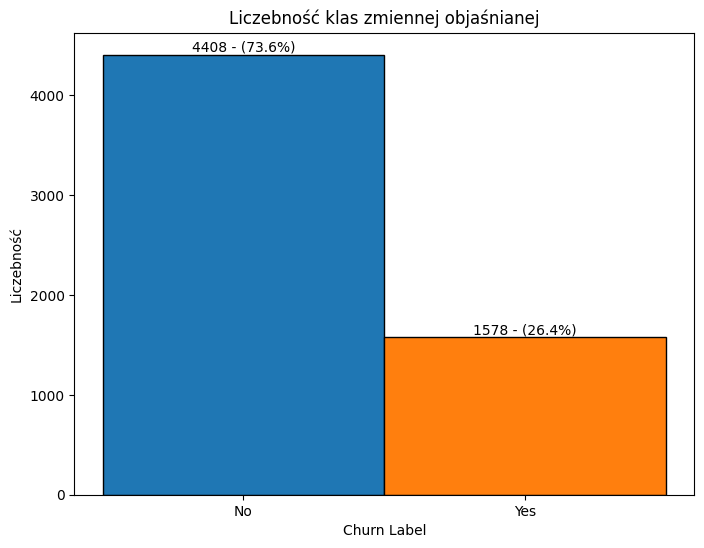

In [35]:
plt.figure(figsize=(8, 6))

# Create the histogram
hist = sns.histplot(df['churn_label'], kde=False)

# Set colors for the bars
colors = ['#1f77b4', '#ff7f0e']  # Customize these colors
for patch, color in zip(hist.patches, colors):
    patch.set_facecolor(color)

# Add labels above the bars
total = len(df['churn_label'])
for patch in hist.patches:
    height = patch.get_height()
    percentage = height / total * 100
    plt.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{int(height)} - ({percentage:.1f}%)',
        ha="center", va="bottom"
    )

# Customizing the plot
plt.ylabel("Liczebność")
plt.xlabel("Churn Label")
plt.title("Liczebność klas zmiennej objaśnianej")

plt.show()

## NA/DUPLICATE HANDLING

In [36]:
df[df.columns[df.isna().sum() > 0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 876 to 4393
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   offer          2723 non-null   object
 1   internet_type  4693 non-null   object
dtypes: object(2)
memory usage: 140.3+ KB


In [37]:
df.offer.unique()

array(['Offer A', nan, 'Offer E', 'Offer D', 'Offer B', 'Offer C'],
      dtype=object)

In [38]:
df.internet_type.unique()

array(['Cable', 'DSL', 'Fiber Optic', nan], dtype=object)

In [39]:
df['offer'].fillna('no_info', inplace=True)
df['internet_type'].fillna('no_info', inplace=True)

## FEATURES

In [40]:
def plot_eda(columns, df_fun=df, num_cols=2, plt_type='hist', bin_num=30, col_labels=False):
    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]

        # Plot the histogram for the entire column
        ax.hist(df_fun[col], bins=bin_num, edgecolor='black', color='#007481')

        ax.set_title(f'Rozkład zm. {col}')
        ax.set_ylabel('Liczebność')
        ax.grid(True)

        if col_labels is True:
            ax.set_xlabel(col)
        else:
            ax.set_xlabel('')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [41]:
def plot_eda_binary(columns, df_fun=df, num_cols=2, col_labels=False):
    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]

        # Calculate the frequencies for the column
        data_counts = df_fun[col].value_counts().sort_index()
        bar_positions = np.arange(len(data_counts))  # Positions for the bars

        # Plot the bars without splitting by churn column
        ax.bar(bar_positions, data_counts, width=0.6, color='#007481', edgecolor='black')

        ax.set_title(f'{col}')
        ax.set_ylabel('Liczebność')
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(data_counts.index, rotation=45)  # Rotate labels for readability
        ax.grid(True)

        if col_labels is True:
            ax.set_xlabel(col)
        else:
            ax.set_xlabel('')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [42]:
def plot_bivar_density(columns, df_fun=df, num_cols=2, churn_col='churn_label', col_labels=False):
    # Get the unique values of the churn column
    churn_values = df_fun[churn_col].unique()
    colors = ['blue', 'orange']  # Colors for different churn categories

    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]

        for j, churn_val in enumerate(churn_values):
            # Plot the density plot
            sns.kdeplot(df_fun[df_fun[churn_col] == churn_val][col],
                        ax=ax,
                        color=colors[j],
                        label=f'Churn: {churn_val}',
                        fill=True)  # fill=True adds shading under the curve

        ax.set_title(f'Wykres gęstości {col}')
        ax.set_ylabel('udział')
        ax.grid(True)
        ax.legend()  # Add legend to differentiate churn categories

        if col_labels:
            ax.set_xlabel(col)
        else:
            ax.set_xlabel('')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [43]:
numerical_cols = [col for col in df.select_dtypes(include=['number']).columns if df[col].nunique() >= 3]
# numerical_cols = [col for col in numerical_cols if col not in ['number_of_dependents']]

In [44]:
binary_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() == 2 and col != 'churn_label']

In [45]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() > 2 and col != 'churn_label']

In [46]:
print(f"""
num of num cols: {len(numerical_cols)}
num of binary cols: {len(binary_cols)}
num of cat cols: {len(cat_cols)}""")


num of num cols: 14
num of binary cols: 18
num of cat cols: 3


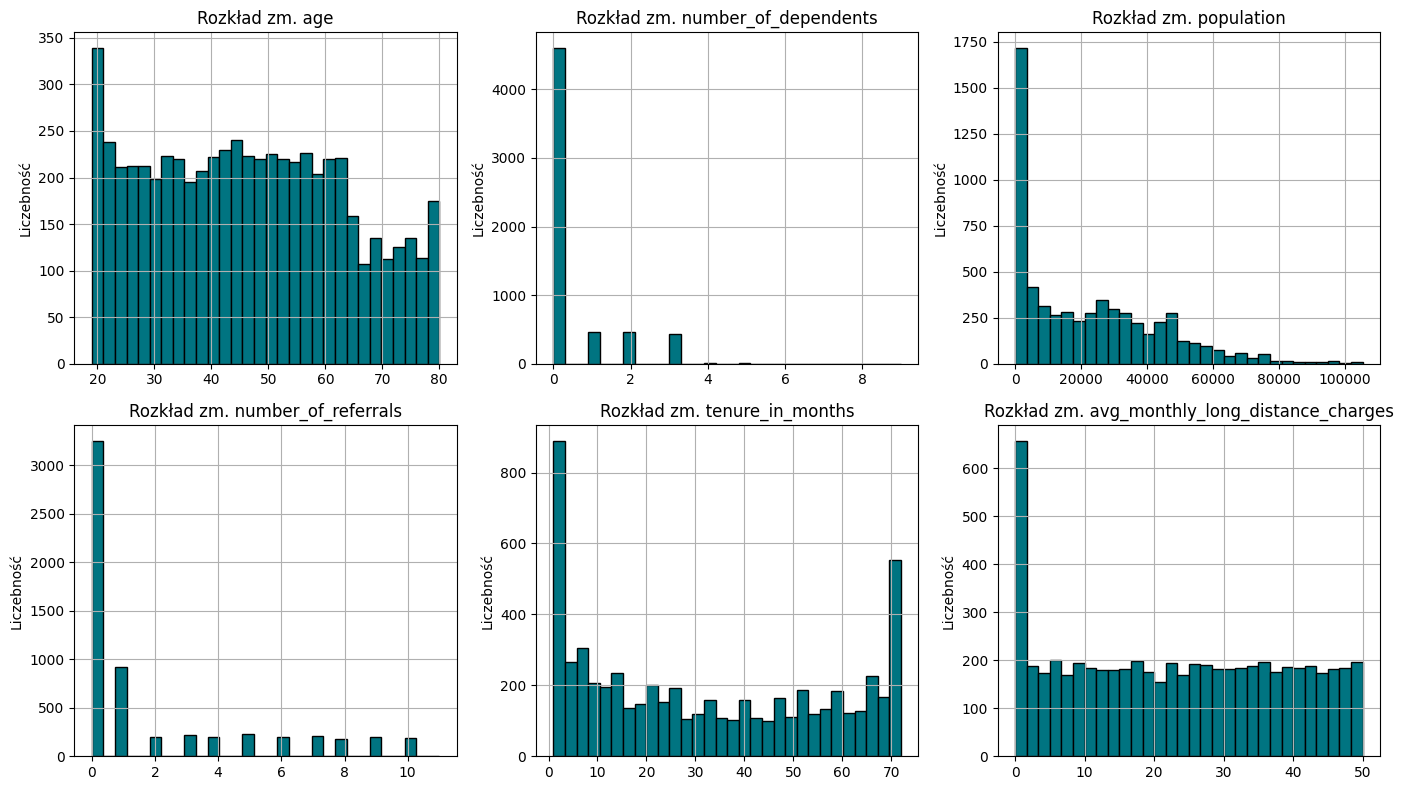

In [47]:
plot_eda(numerical_cols[0:6],num_cols=3)

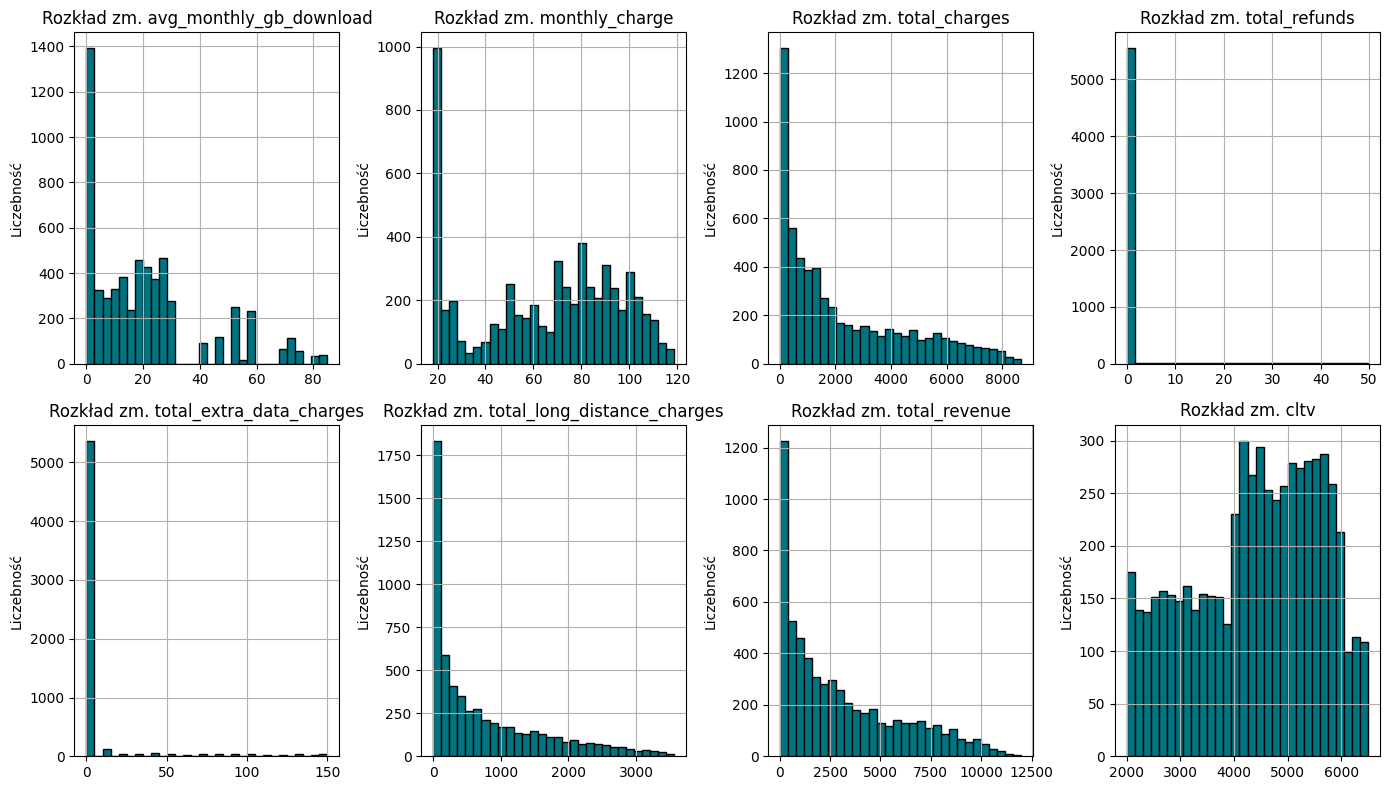

In [48]:
plot_eda(numerical_cols[6:],num_cols=4,bin_num=30)

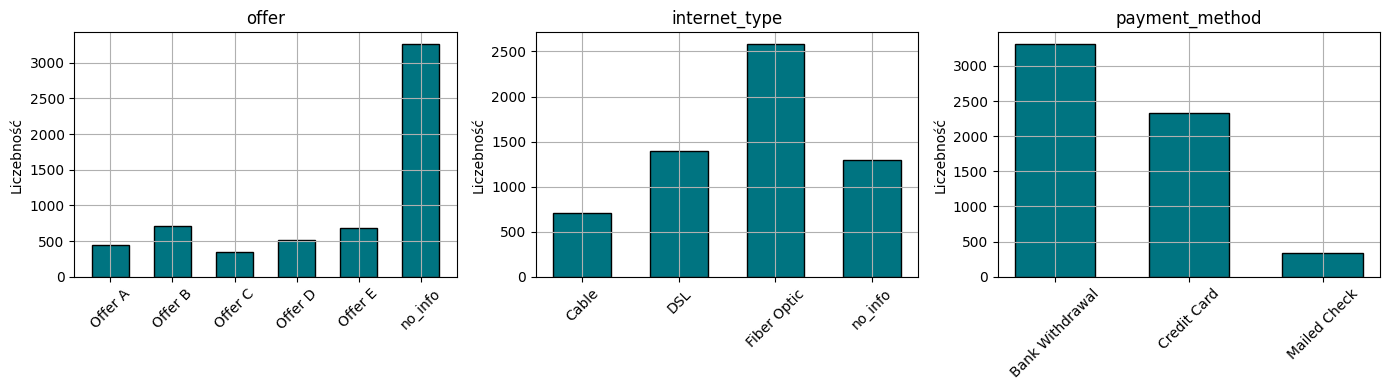

In [49]:
plot_eda_binary(cat_cols,num_cols=3)

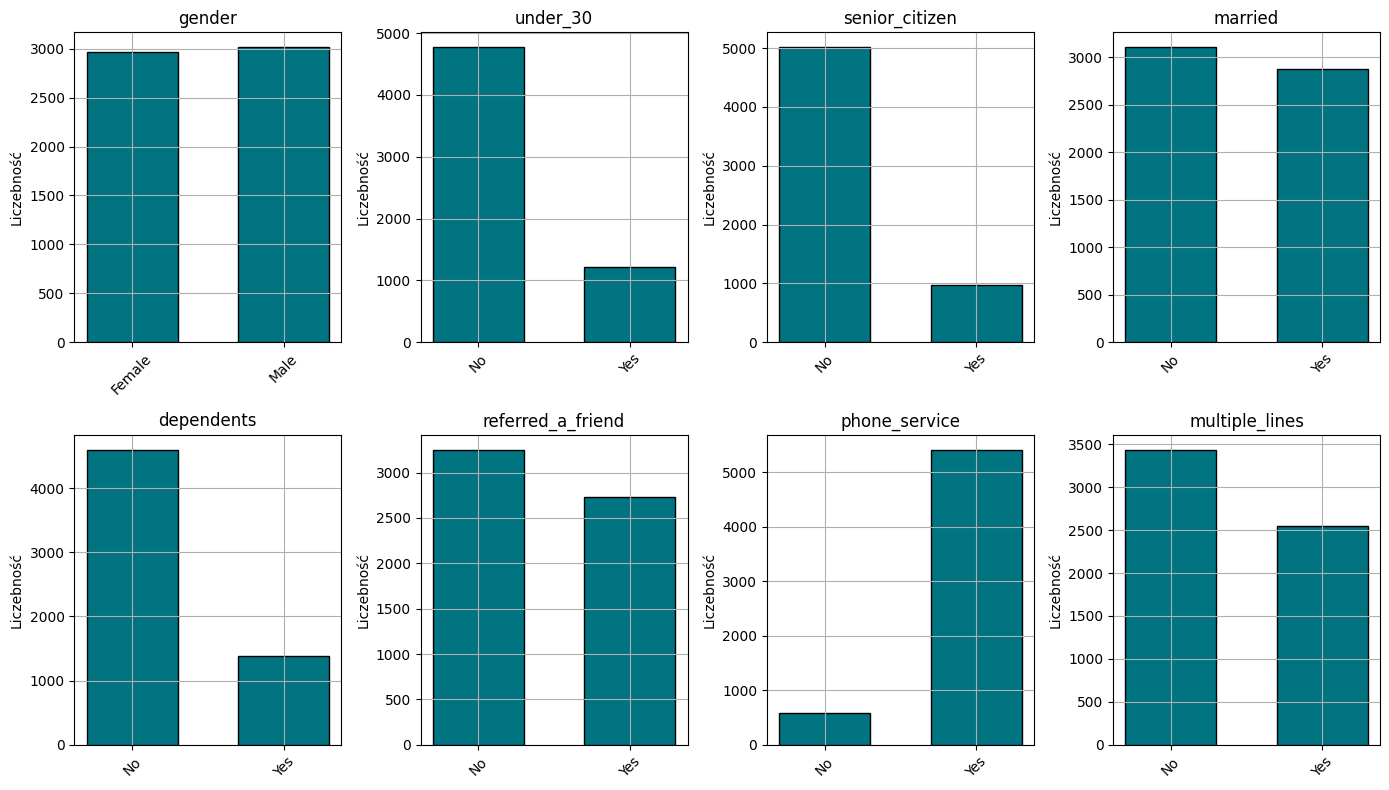

In [50]:
plot_eda_binary(binary_cols[0:8],num_cols=4,col_labels=False)

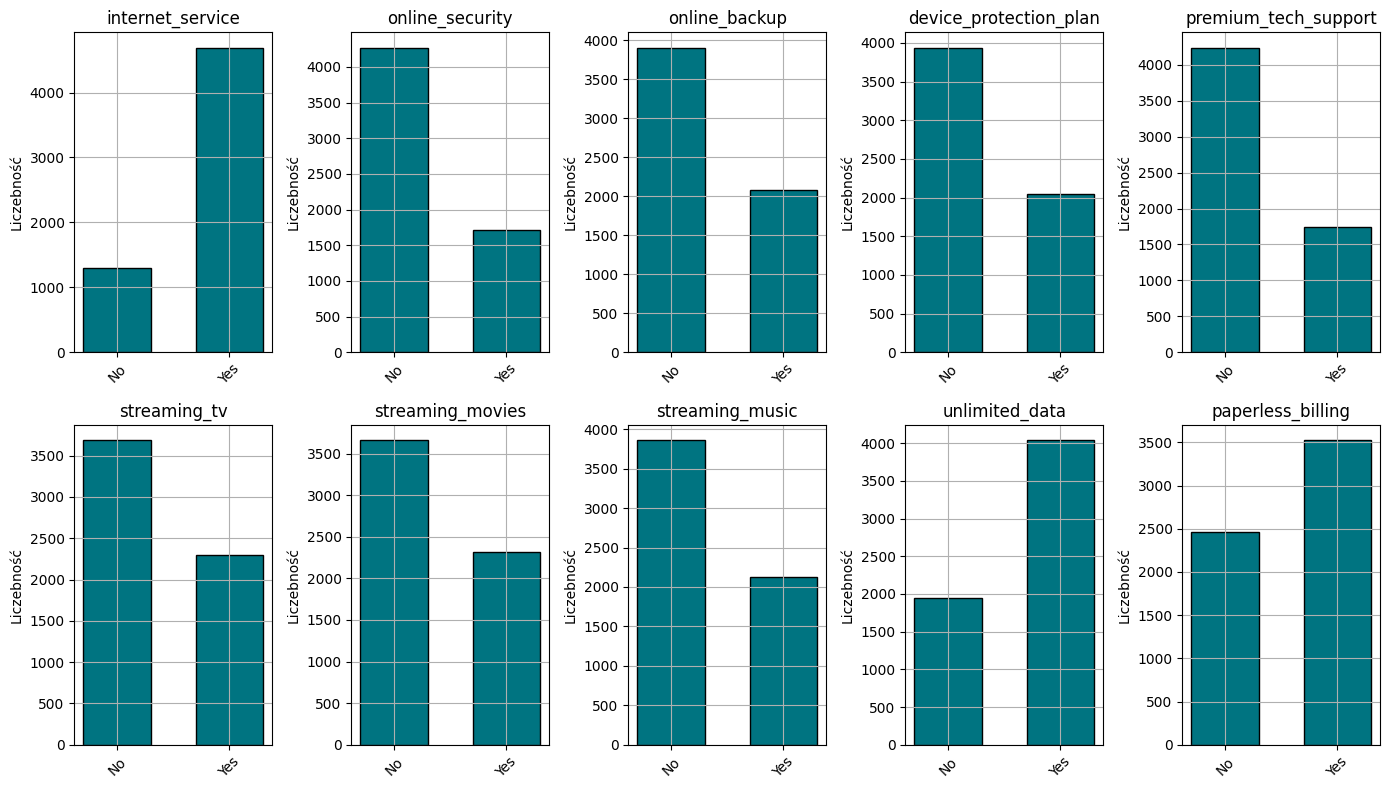

In [51]:
plot_eda_binary(binary_cols[8:],num_cols=5,col_labels=False)

# Data Transformation

In [52]:
5986-2723

3263

In [53]:
1-2723/5986
#offer

0.5451052455730037

In [54]:
df.internet_service.value_counts()

,count
internet_service,
Yes,4693
No,1293


In [55]:
5986-4693

1293

In [56]:
1-4693/5986
# iint type

0.21600400935516206

### feature engineering  

In [57]:
df.number_of_dependents.value_counts()

,count
number_of_dependents,
0,4601
1,465
2,460
3,437
4,9
5,8
7,2
6,2
9,1


In [58]:
val_cnt_nod = df['number_of_dependents'].value_counts().sort_index()

In [59]:
df['number_of_dependents'] = df['number_of_dependents'].apply(lambda x: '3/3+' if x >= 3 else x)
df['number_of_dependents'] = df['number_of_dependents'].astype(str)

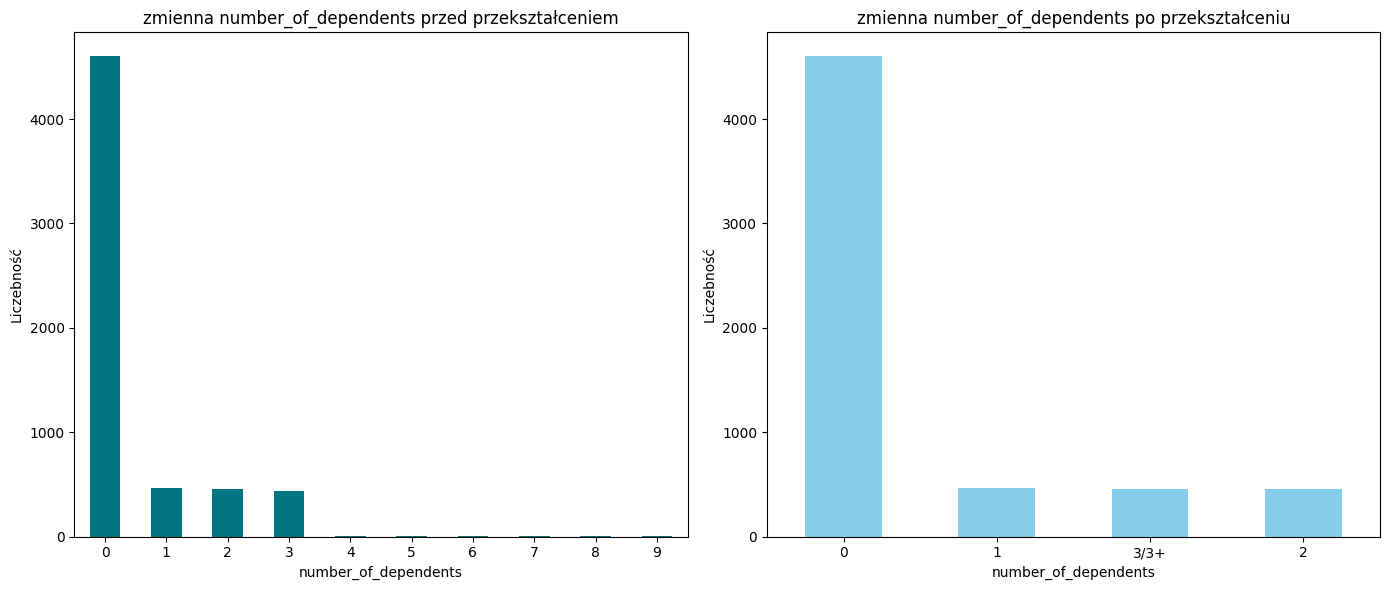

In [60]:
# Plotting the numerical counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Left plot: Numerical values before binning
val_cnt_nod.plot(kind='bar', color='#007481', ax=axes[0])
axes[0].set_title('zmienna number_of_dependents przed przekształceniem')
axes[0].set_xlabel('number_of_dependents')
axes[0].set_ylabel('Liczebność')
axes[0].set_xticks(range(len(val_cnt_nod)))
axes[0].set_xticklabels(val_cnt_nod.index, rotation=0)


value_counts = df['number_of_dependents'].value_counts()
# Right plot: Categories after binning
value_counts.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('zmienna number_of_dependents po przekształceniu')
axes[1].set_xlabel('number_of_dependents')
axes[1].set_ylabel('Liczebność')
axes[1].set_xticks(range(len(value_counts)))
axes[1].set_xticklabels(value_counts.index, rotation=0)

plt.tight_layout()
plt.show()

In [61]:
value_counts_numerical = df['number_of_referrals'].value_counts().sort_index()

In [62]:
bins = [0, 1, 3, 7, float('inf')]
labels = ['0', '1-2', '3-6', '7+']

# Creating a new column 'referral_bucket' based on the bins and labels
df['number_of_referrals'] = pd.cut(df['number_of_referrals'], bins=bins, labels=labels, right=False, include_lowest=True)


In [63]:
df.number_of_referrals.value_counts()

,count
number_of_referrals,
0,3254
1-2,1114
3-6,839
7+,779


In [64]:
df.groupby('number_of_referrals')['churn_label'].value_counts()

<ipython-input-64-473d1611d9f3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('number_of_referrals')['churn_label'].value_counts()


number_of_referrals  churn_label
0                    No             2207
                     Yes            1047
1-2                  No              660
                     Yes             454
3-6                  No              774
                     Yes              65
7+                   No              767
                     Yes              12
Name: count, dtype: int64

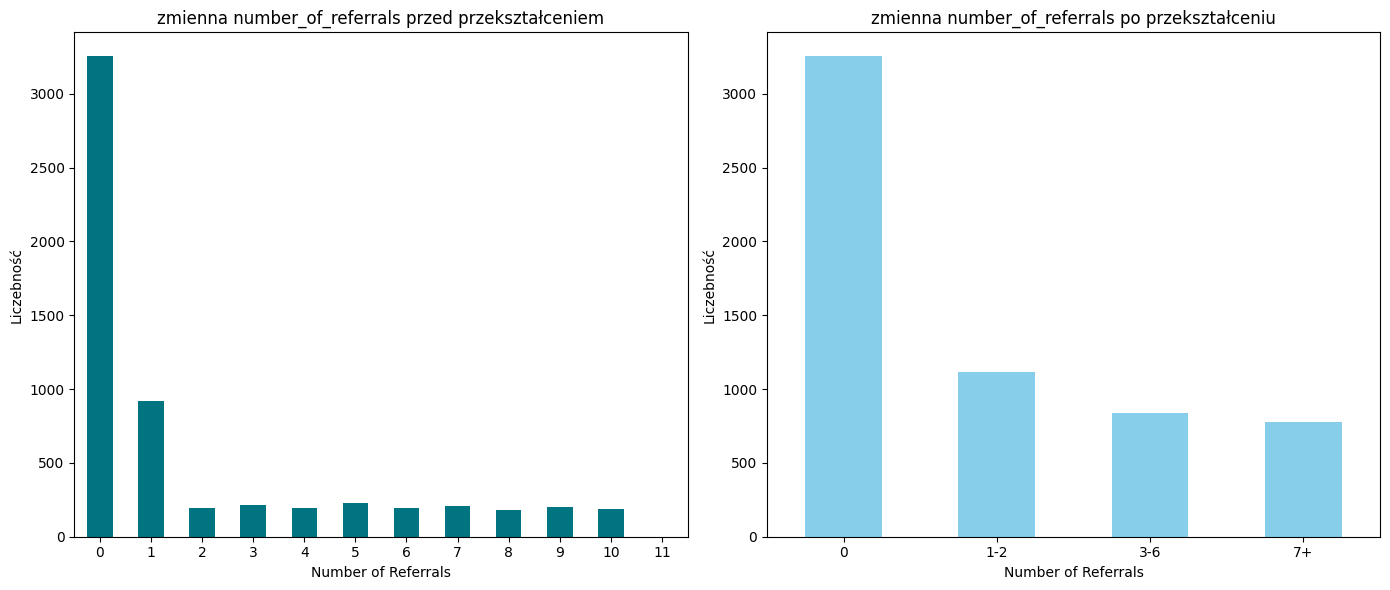

In [65]:
# Plotting the numerical counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Left plot: Numerical values before binning
value_counts_numerical.plot(kind='bar', color='#007481', ax=axes[0])
axes[0].set_title('zmienna number_of_referrals przed przekształceniem')
axes[0].set_xlabel('Number of Referrals')
axes[0].set_ylabel('Liczebność')
axes[0].set_xticks(range(len(value_counts_numerical)))
axes[0].set_xticklabels(value_counts_numerical.index, rotation=0)


value_counts = df['number_of_referrals'].value_counts()
# Right plot: Categories after binning
value_counts.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('zmienna number_of_referrals po przekształceniu')
axes[1].set_xlabel('Number of Referrals')
axes[1].set_ylabel('Liczebność')
axes[1].set_xticks(range(len(value_counts)))
axes[1].set_xticklabels(value_counts.index, rotation=0)

plt.tight_layout()
plt.show()

In [66]:
df.total_long_distance_charges.skew()

1.2319063143622475

In [67]:
df.total_charges.skew()


0.9575061113994016

In [68]:
df.total_revenue.skew()

0.9149760277288079

In [69]:
df.avg_monthly_gb_download.skew()


1.2121056904081917

In [70]:
data=df.copy()

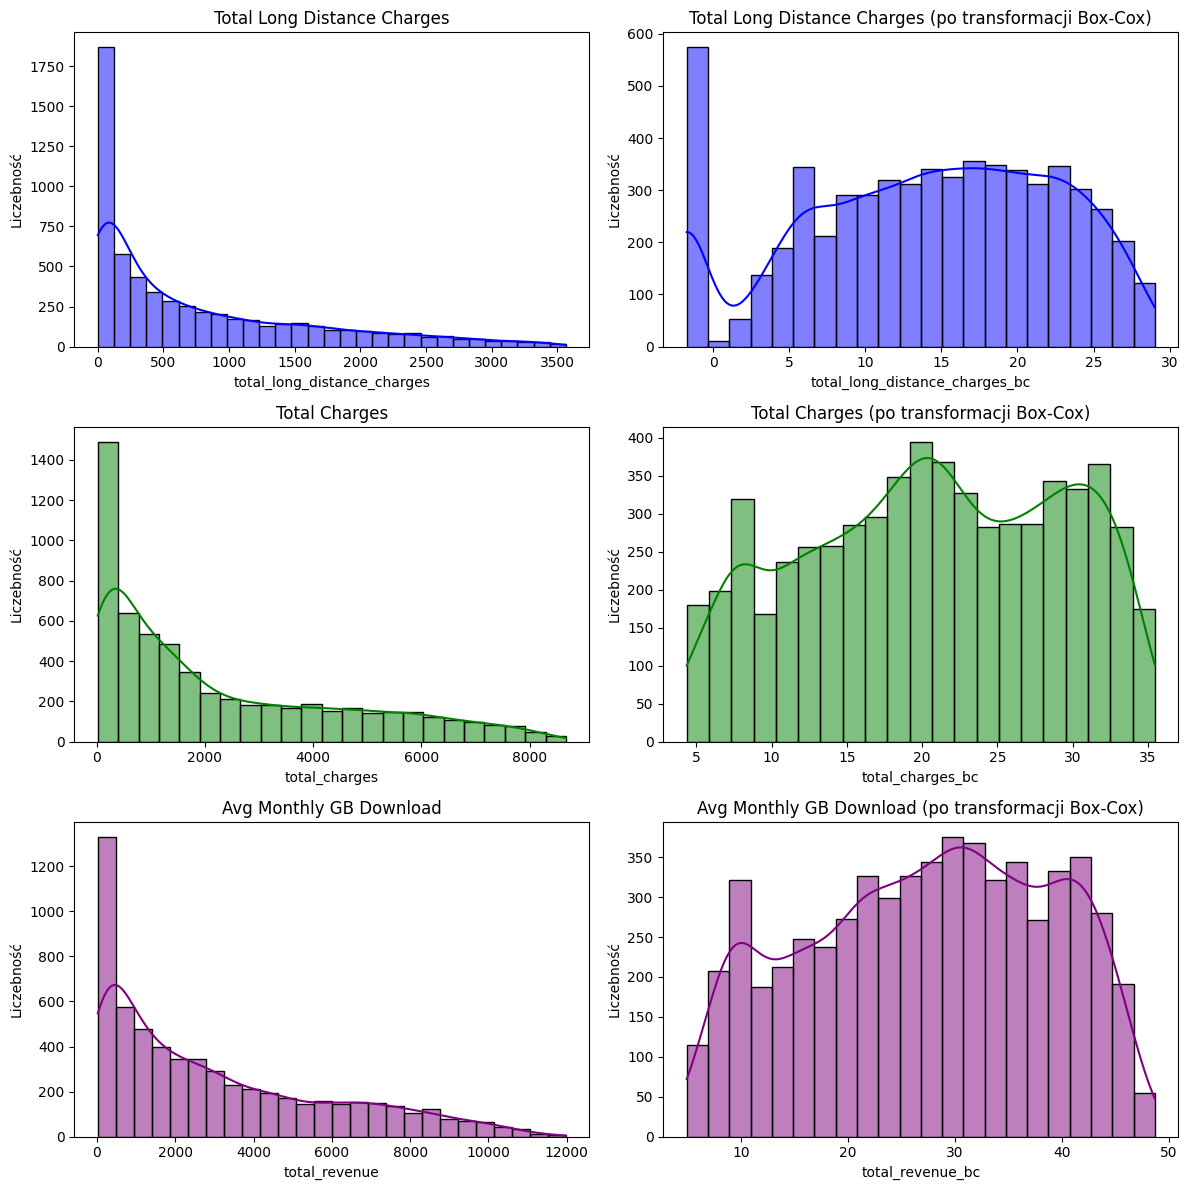

In [71]:
data['total_long_distance_charges_bc'], bc_param_ld_charge = stats.boxcox(data['total_long_distance_charges'] + 0.1)  # +1 to avoid zero values
data['total_charges_bc'], bc_param_charges = stats.boxcox(data['total_charges'] + 0.1)
data['total_revenue_bc'], bc_param_reve = stats.boxcox(data['total_revenue'] + 0.1)
# Plotting
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Original distributions
sns.histplot(data['total_long_distance_charges'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Total Long Distance Charges')
axes[0, 0].set_ylabel('Liczebność')

sns.histplot(data['total_charges'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Total Charges')
axes[1, 0].set_ylabel('Liczebność')

sns.histplot(data['total_revenue'], kde=True, ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Avg Monthly GB Download')
axes[2, 0].set_ylabel('Liczebność')

# Transformed distributions
sns.histplot(data['total_long_distance_charges_bc'], kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Total Long Distance Charges (po transformacji Box-Cox)')
axes[0, 1].set_ylabel('Liczebność')

sns.histplot(data['total_charges_bc'], kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Total Charges (po transformacji Box-Cox)')
axes[1, 1].set_ylabel('Liczebność')

sns.histplot(data['total_revenue_bc'], kde=True, ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Avg Monthly GB Download (po transformacji Box-Cox)')
axes[2, 1].set_ylabel('Liczebność')

plt.tight_layout()
plt.show()

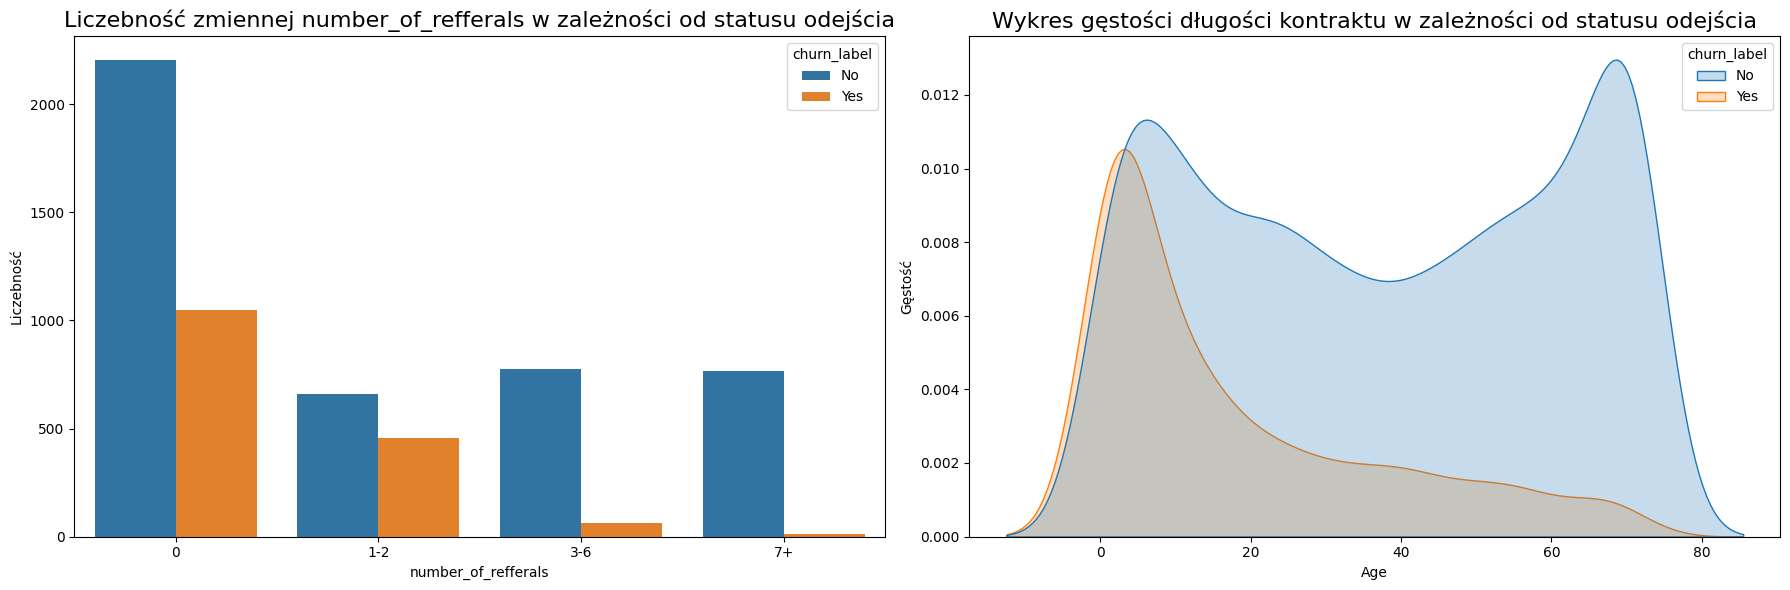

In [72]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='number_of_referrals', hue='churn_label', data=df)
plt.title('Liczebność zmiennej number_of_refferals w zależności od statusu odejścia',fontsize=16)
plt.xlabel('number_of_refferals')
plt.ylabel('Liczebność')

# Plot 2: Scatter plot of Total Long Distance Charges vs. Total Revenue
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='tenure_in_months', hue='churn_label', fill=True)
plt.title('Wykres gęstości długości kontraktu w zależności od statusu odejścia', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Gęstość')

plt.tight_layout()
plt.show()

In [73]:
df['total_long_distance_charges'] = stats.boxcox(df['total_long_distance_charges'] + 0.1, lmbda=bc_param_ld_charge)  # +1 to avoid zero values
df['total_charges'] = stats.boxcox(df['total_charges'] + 0.1,lmbda=bc_param_charges)
df['total_revenue'] = stats.boxcox(df['total_revenue'] + 0.1,lmbda=bc_param_reve)

In [74]:
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

# Fit and transform only the categorical columns listed in cat_cols
cat_cols.append('number_of_referrals')
cat_cols.append('number_of_dependents')

encoded_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]))

# Get the original column names and assign them to the encoded dataframe
encoded_df.columns = encoder.get_feature_names_out(cat_cols)

# Drop the original categorical columns and concatenate the encoded columns
df = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [75]:
df.head(2)

,gender,age,under_30,senior_citizen,married,dependents,population,referred_a_friend,tenure_in_months,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,offer_no_info,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_no_info,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,number_of_referrals_0,number_of_referrals_1-2,number_of_referrals_3-6,number_of_referrals_7+,number_of_dependents_0,number_of_dependents_1,number_of_dependents_2,number_of_dependents_3/3+
0,Male,79,No,Yes,Yes,No,9423,Yes,67,Yes,42.07,No,Yes,12,Yes,Yes,No,Yes,No,No,No,Yes,Yes,60.95,28.677613,17.19,0,27.050083,41.061776,No,5792,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,Male,59,No,No,No,No,14859,No,34,No,0.00,No,Yes,28,No,No,No,No,No,No,No,Yes,Yes,25.05,17.923295,0.00,0,-1.725482,20.855780,No,3800,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [76]:
df = df.replace({"No": False, "Yes": True})

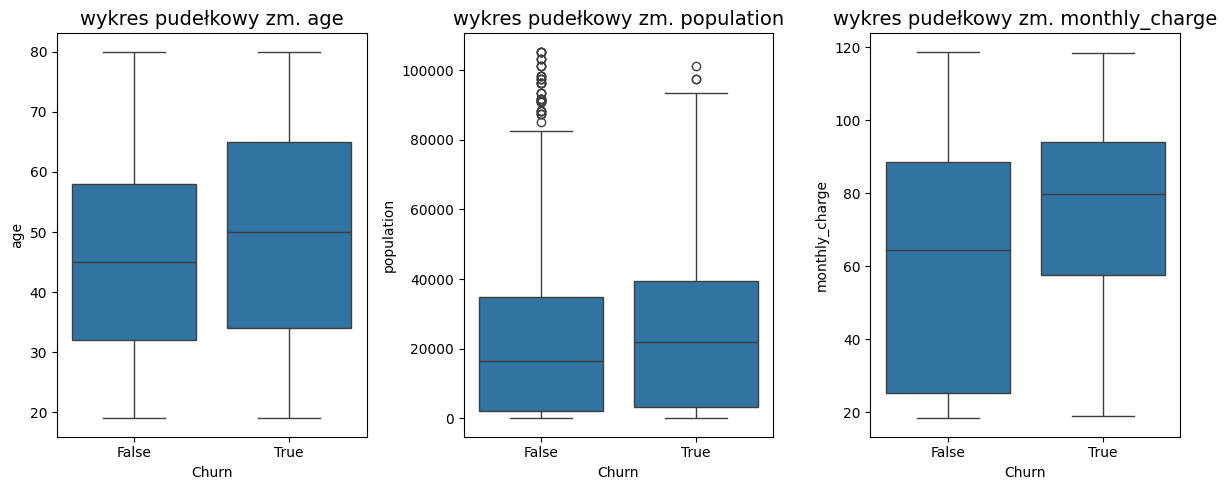

In [77]:
columns_to_plot = ['age', 'population', 'monthly_charge']

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df['churn_label'], y=df[col], ax=axes[i])
    axes[i].set_title(f'wykres pudełkowy zm. {col}',fontsize=14)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [78]:
df = df.replace({"Female": False, "Male": True})

In [79]:
binary_cols.append('churn_label')

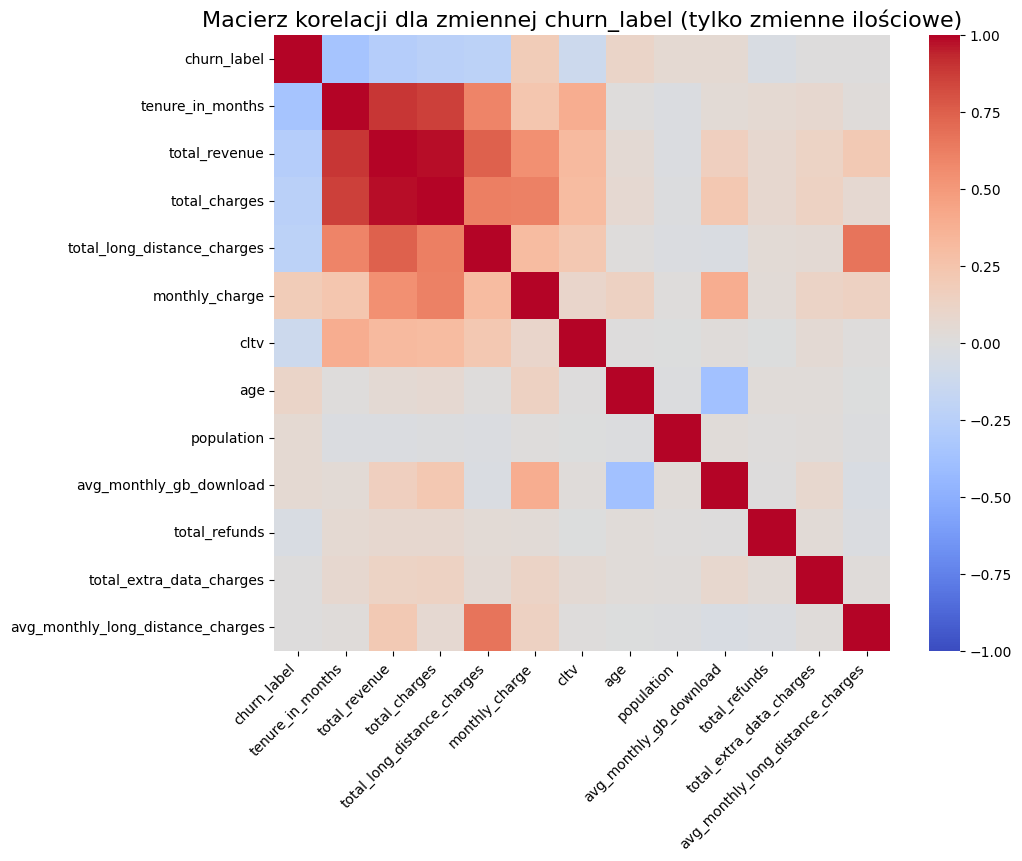

In [80]:
numerical_cols.append('churn_label')
numerical_cols.remove('number_of_dependents')
numerical_cols.remove('number_of_referrals')

corr_matrix = df[numerical_cols].corr()

# Extract the correlations involving the churn column (assuming 'churn_label_Yes' is in numerical_cols)
columns_of_interest = corr_matrix['churn_label'].abs().sort_values(ascending=False).index
selected_corr_matrix = corr_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Macierz korelacji dla zmiennej churn_label (tylko zmienne ilościowe)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

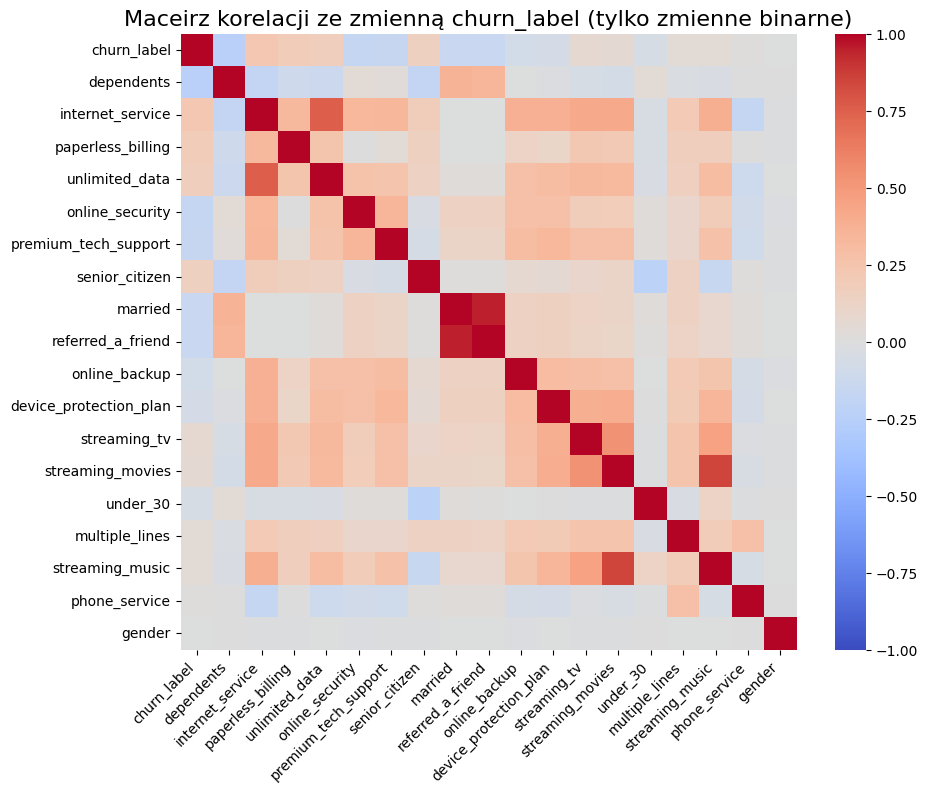

In [81]:
corr_matrix = df[binary_cols].corr()

# Extract the correlations involving the churn column (assuming 'churn_label_Yes' is in numerical_cols)
columns_of_interest = corr_matrix['churn_label'].abs().sort_values(ascending=False).index
selected_corr_matrix = corr_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Maceirz korelacji ze zmienną churn_label (tylko zmienne binarne)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [82]:
columns_to_exclude = binary_cols + numerical_cols

# Remove 'Churn' from the list of columns to exclude, if it's in the list
columns_to_exclude = [col for col in columns_to_exclude if col != 'churn_label']

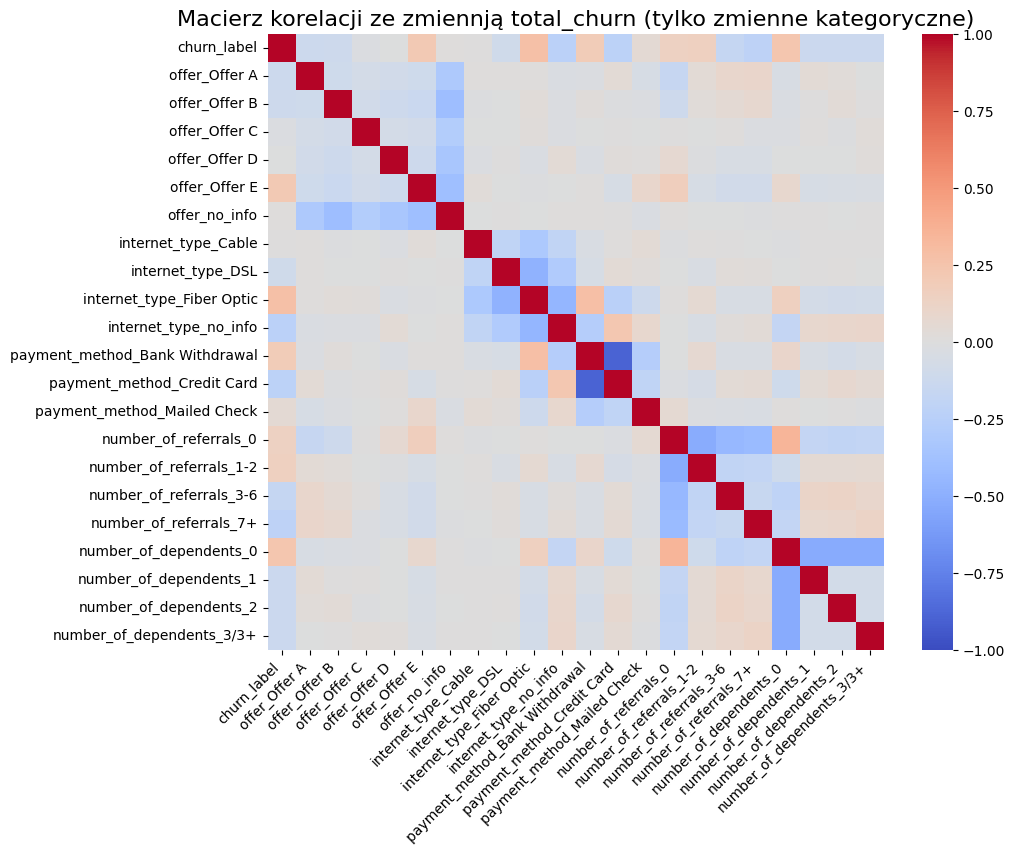

In [83]:
corr_matrix = df[df.drop(columns=columns_to_exclude).columns.unique()].corr()

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Macierz korelacji ze zmiennją total_churn (tylko zmienne kategoryczne)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [84]:
target_correlations = corr_matrix['churn_label']

# Identify features with correlation smaller than 0.01 (absolute value)
low_correlation_features = target_correlations[abs(target_correlations) < 0.05].index

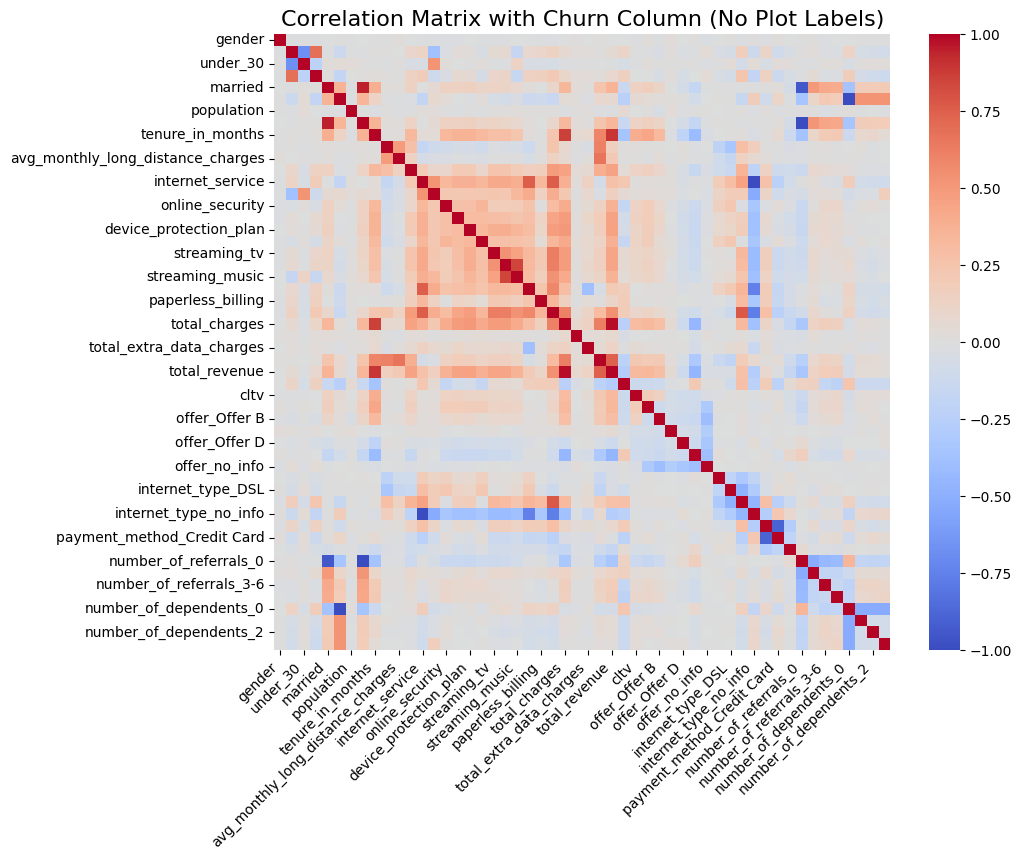

In [85]:
corr_matrix = df.corr()

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Correlation Matrix with Churn Column (No Plot Labels)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

<ipython-input-86-c964a9a41d23>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_correlations.values, y=combined_correlations.index, palette='viridis')


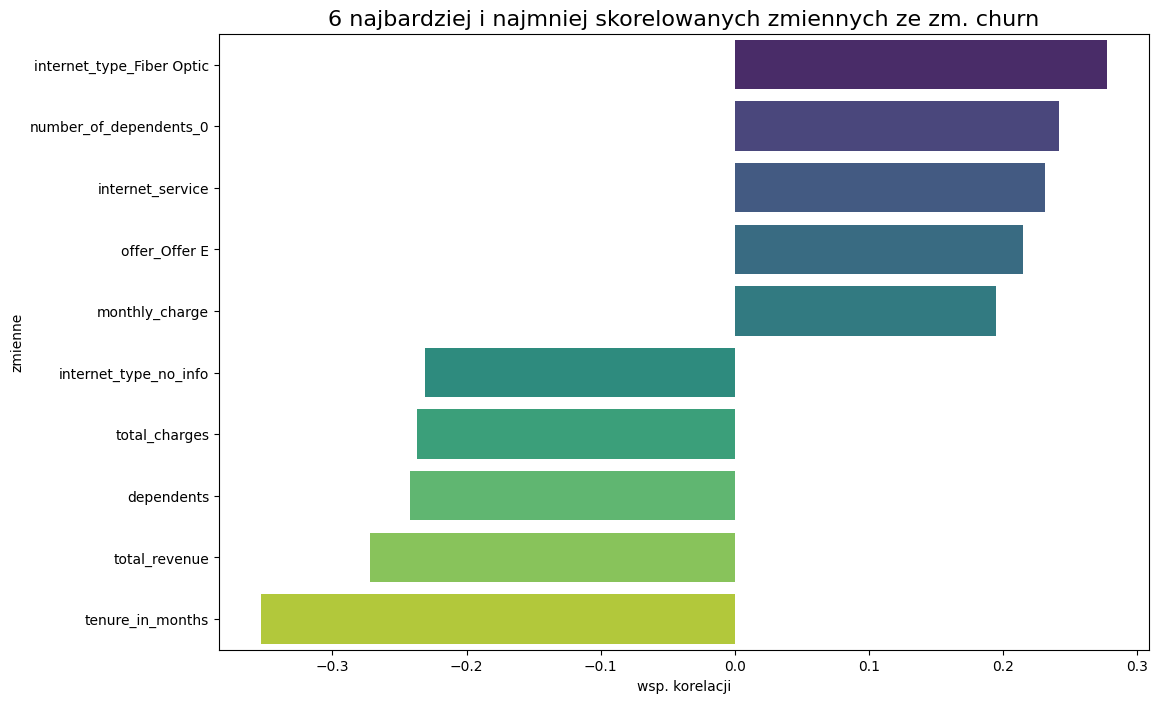

In [86]:
correlation_matrix = df.corr()
churn_correlation = correlation_matrix['churn_label'].sort_values()
most_correlated = churn_correlation.tail(6).head(5)  # Exclude the 'Churn' correlation with itself
least_correlated = churn_correlation.head(5)
combined_correlations = pd.concat([most_correlated, least_correlated]).sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=combined_correlations.values, y=combined_correlations.index, palette='viridis')
plt.title('6 najbardziej i najmniej skorelowanych zmiennych ze zm. churn',fontsize=16)
plt.xlabel('wsp. korelacji')
plt.ylabel('zmienne')
plt.show()

## modeling

How can we improve model? Depends what we aim for?

1. define the problem
1. Here choose a model metric we will be looking to optimise based on market reports and current tactics (google!)

1. EDA and approach to data cleaning manipulation
1. train test split target VAR description

1. Create base LR model to see how it performs
2. See how good can you make LR model by tuning hyperparameters training by using KFOLD / resampling train test and so on
    - we will have lots and lots of variables so using lasso/ ridge could turn out good explain them and see which parameter does the trick
    - adding variable combinations if possible and they make sense as a one way to improve a model
    - outline the advantages of LR such as interpretability of results coefficients and so on

3. ML Methods bagging XGB RandomForest
    - tweaking them by randomgridsearch/ gridsearch
    - train/test rebalancing by undersampling oversampling/ smooten
    - same methods as above


#### LEVERAGE LIFT USE XD BECAUSE IT SOUNDS WELL

4. Neural network maybe? Idk about the volume of Prior work
5. Sum up the work which model performed better and so on. State that its dependent in use case and recommend using one based on this paper in this case and current trends.

# Train Test Split


In [89]:
holdout_df = holdout_df.replace({"Female": False, "Male": True})
holdout_df['offer'].fillna('no_info', inplace=True)
holdout_df['internet_type'].fillna('no_info', inplace=True)
# holdout_df['satisfaction_score'] = holdout_df['satisfaction_score'].map(satisfaction_mapping)
holdout_df['number_of_dependents'] = holdout_df['number_of_dependents'].apply(lambda x: '3/3+' if x >= 3 else x).astype(str)
holdout_df['number_of_referrals'] = pd.cut(holdout_df['number_of_referrals'], bins=bins, labels=labels, right=False, include_lowest=True)

In [90]:
encoded_holdout_df = pd.DataFrame(encoder.fit_transform(holdout_df[cat_cols]))

# Get the original column names and assign them to the encoded dataframe
encoded_holdout_df.columns = encoder.get_feature_names_out(cat_cols)

# Drop the original categorical columns and concatenate the encoded columns
holdout_df = pd.concat([holdout_df.drop(columns=cat_cols).reset_index(drop=True), encoded_holdout_df.reset_index(drop=True)], axis=1)
holdout_df = holdout_df.replace({"No": False, "Yes": True})

In [91]:
holdout_df['total_long_distance_charges'] = stats.boxcox(holdout_df['total_long_distance_charges'] + 0.1, lmbda=bc_param_ld_charge)  # +1 to avoid zero values
holdout_df['total_charges'] = stats.boxcox(holdout_df['total_charges'] + 0.1,lmbda=bc_param_charges)
holdout_df['total_revenue'] = stats.boxcox(holdout_df['total_revenue'] + 0.1,lmbda=bc_param_reve)

In [92]:
set(df.columns) - set(holdout_df)

set()

In [93]:
X_train = df.drop(columns=['churn_label'])
y_train = df['churn_label']

X_test = holdout_df.drop(columns=['churn_label'])
y_test = holdout_df['churn_label']

In [94]:
y_train.value_counts()

,count
churn_label,
False,4408
True,1578


In [95]:
(4408+1578)

5986

In [96]:
1578/(4408+1578)

0.2636151019044437

In [97]:
df.shape

(5986, 52)

In [98]:
selector = SelectKBest(mutual_info_classif, k=30)

X_train_mi = selector.fit_transform(X_train, y_train)
X_test_mi = selector.transform(X_test)

X_train_mi.shape

(5986, 30)

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
from imblearn.combine import SMOTEENN

In [101]:
smote_enn = SMOTEN(random_state=1973)

In [102]:
X_train_smoten, y_train_smoten = smote_enn.fit_resample(X_train_scaled, y_train)

In [103]:
smote_tomek = SMOTETomek(random_state=1973)
X_train_res_smote, y_train_res_smote = smote_tomek.fit_resample(X_train_scaled, y_train)

In [104]:
def evaluate_model(y_pred_proba, y_test, ret_df=False, plot_roc=False, name='model_name'):
    # Convert probabilities to class predictions based on a threshold of 0.5
    y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba[:,1])

    print(f"""Model Performance:
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    """)

    if plot_roc == True:
        # Plotting the ROC curve with different thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {round(auc, 3)})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc="lower right")
        print(f'AUC = {round(auc*100, 3)}%')

        # # Annotate the thresholds
        # for i in range(len(thresholds)):
        #     plt.annotate(f'{round(thresholds[i], 2)}',
        #                 xy=(fpr[i], tpr[i]),
        #                 textcoords='offset points',
        #                 xytext=(0, 10),
        #                 ha='center')

    plt.show()

    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1],
            'AUC': [auc]
        }
        return pd.DataFrame(metrics)

In [105]:
def simple_eval(y_pred_proba, y_test, ret_df=False, name='model_name'):
    y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    print(f"""Model Performance:
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    AUC = {round(auc*100, 3)}%
    """)

    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1],
            'AUC': [auc]
        }
        return pd.DataFrame(metrics)

# KFOLD

In [106]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1973)

In [107]:
# scoring = make_scorer(f1_score, average='weighted')  # Adjust 'average' depending on your problem
scoring = make_scorer(roc_auc_score, needs_proba=True)

# Lin reg

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
datasets = {
    "Original Data": (X_train, y_train, X_test, y_test),
    "MI Selected Data": (X_train_mi, y_train, X_test_mi, y_test),
    "Scaled Data": (X_train_scaled, y_train, X_test_scaled, y_test),
    "SMOTE Resampled Data": (X_train_res_smote, y_train_res_smote, X_test_scaled, y_test)
}

In [ ]:
def test_k(X_train=X_train,y_train=y_train,k_values = list(range(5, 41, 2)),selector='SFM'):
    roc_auc_scores = []
    accuracy_scores = []
    f1_scores = []

    # Loop over different values of k
    for k in k_values:
        model = LogisticRegression(max_iter=1000, random_state=42)
        if selector =='SFM':
            selector = SelectFromModel(model, max_features=k)
        elif selector=='RFE':
            selector = RFE(model, n_features_to_select=k)
        elif selector=='KBE':
            selector=SelectKBest(mutual_info_classif, k=k)

        X_train_mi = selector.fit_transform(X_train, y_train)
        X_test_mi = selector.transform(X_test)

        # Train logistic regression model
        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_mi, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test_mi)
        y_pred_prob = model.predict_proba(X_test_mi)[:, 1]

        # Calculate metrics
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store the results
        roc_auc_scores.append(roc_auc)
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

    # Plot the results
    plt.figure(figsize=(14, 8))
    plt.plot(k_values, roc_auc_scores, marker='o', label='ROC AUC Score')
    plt.plot(k_values, accuracy_scores, marker='o', label='Accuracy')
    plt.plot(k_values, f1_scores, marker='o', label='F1 Score')
    plt.xlabel('Number of Selected Features (k)')
    plt.ylabel('Score')
    plt.title('Logistic Regression Performance vs. Number of Selected Features')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Check for consistency in the number of samples
    if X_train.shape[0] != y_train.shape[0] or X_test.shape[0] != y_test.shape[0]:
        print(f"Skipping {name} due to inconsistent sample sizes.")
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
        print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
        continue

    # Train the model
    log_reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_proba = log_reg.predict_proba(X_test)

    # Evaluate the predictions
    print(f"Evaluating for {name}: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    simple_eval(y_pred_proba, y_test)
    print("-" * 50)  # Separator for clarity in output

Evaluating for Original Data: X_train shape: (5986, 51), X_test shape: (1057, 51)
Model Performance: 
    Accuracy = 80.511%
    Recall = 55.326%
    Precision = 67.932%
    F1 Score = 60.985%
    AUC = 87.784%
    
--------------------------------------------------
Evaluating for MI Selected Data: X_train shape: (5986, 30), X_test shape: (1057, 30)
Model Performance: 
    Accuracy = 77.483%
    Recall = 41.924%
    Precision = 63.874%
    F1 Score = 50.622%
    AUC = 82.071%
    
--------------------------------------------------
Evaluating for Scaled Data: X_train shape: (5986, 51), X_test shape: (1057, 51)
Model Performance: 
    Accuracy = 82.308%
    Recall = 59.107%
    Precision = 71.667%
    F1 Score = 64.783%
    AUC = 88.811%
    
--------------------------------------------------
Evaluating for SMOTE Resampled Data: X_train shape: (8738, 51), X_test shape: (1057, 51)
Model Performance: 
    Accuracy = 80.7%
    Recall = 83.849%
    Precision = 60.848%
    F1 Score = 70.52%
 

In [ ]:
model=LogisticRegression(max_iter=10000)

In [ ]:
model.fit(X_train_smoten,y_train_smoten)

LogisticRegression(max_iter=10000)

In [ ]:
simple_eval(model.predict_proba(X_test_scaled),y_test)

Model Performance: 
    Accuracy = 80.795%
    Recall = 63.23%
    Precision = 65.714%
    F1 Score = 64.448%
    AUC = 87.331%
    


In [ ]:
y_train_res_smote.value_counts()

churn_label
False    4369
True     4369
Name: count, dtype: int64

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
def test_forward(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    roc_auc_scores = []
    f1_scores = []
    accuracy_scores = []

    # Initialize the model
    model = LogisticRegression(max_iter=10000)

    # Fit RFE to select features
    rfe = RFE(estimator=model, n_features_to_select=1, step=1)
    rfe.fit(X_train, y_train)

    # Rank the features based on RFE
    ranking = rfe.ranking_

    # Sort features by their ranking
    ranked_features = np.argsort(ranking)

    for i in range(1, len(ranked_features) + 1):
        selected_features = ranked_features[:i]

        # Subset the training and test data with selected features
        X_train_selected = X_train[:, selected_features]
        X_test_selected = X_test[:, selected_features]

        # Fit the model with the selected features
        model.fit(X_train_selected, y_train)

        # Make predictions
        y_pred = model.predict(X_test_selected)
        y_prob = model.predict_proba(X_test_selected)[:, 1]

        # Calculate metrics
        roc_auc = roc_auc_score(y_test, y_prob)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # Append metrics to the lists
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)

    # Plot the metrics
    plt.figure(figsize=(12, 8))
    plt.plot(range(1, len(ranked_features) + 1), roc_auc_scores, label='ROC AUC', marker='o')
    plt.plot(range(1, len(ranked_features) + 1), f1_scores, label='F1 Score', marker='o')
    plt.plot(range(1, len(ranked_features) + 1), accuracy_scores, label='Accuracy', marker='o')
    plt.xlabel('Liczba zmiennych')
    plt.ylabel('Score')
    plt.title('Metryki jakość modelu vs. liczba zmiennych')
    plt.legend()
    plt.grid(True)
    plt.show()

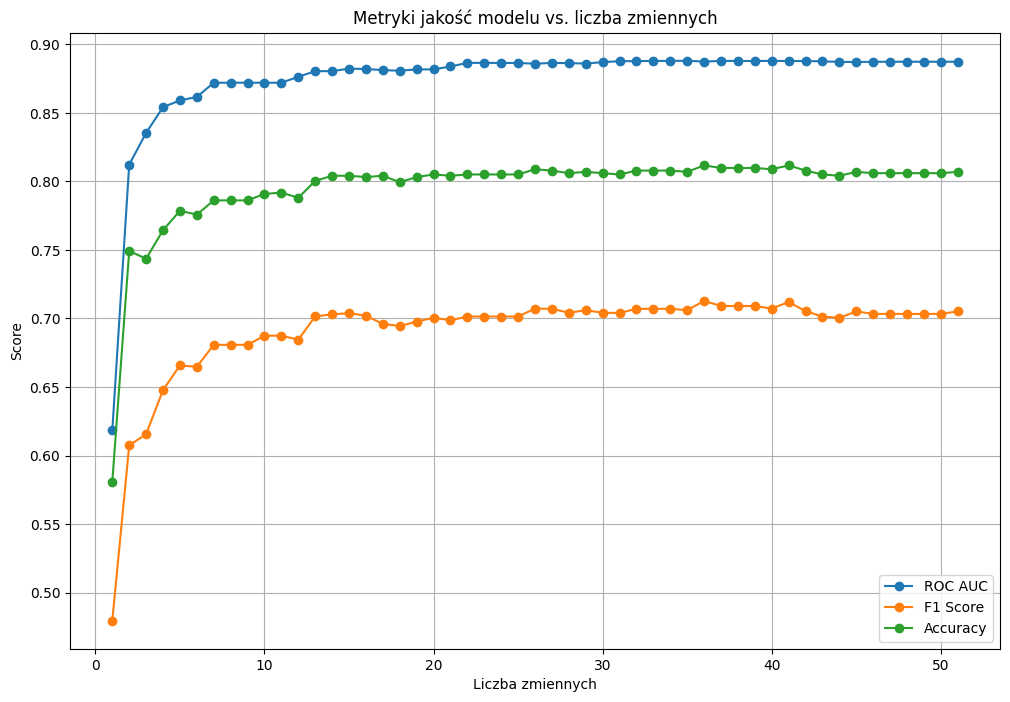

In [ ]:
test_forward()

In [ ]:
# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [1,3, 5,9, 10,11],  # Regularization strength
    'penalty': ['l1'],  # Regularization type ('l1' requires 'liblinear' or 'saga', but can be tricky)
    'solver': ['liblinear', 'saga'],  # Solvers compatible with 'l1' and 'l2'
    'max_iter': [100, 200, 500]  # Number of iterations
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(X_train_res_smote, y_train_res_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1973, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [1, 3, 5, 9, 10, 11], 'max_iter': [100, 200, 500],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

best_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=9, penalty='l1', solver='liblinear')>

In [ ]:
y_pred = best_model.predict_proba(X_test_scaled)
simple_eval(y_pred,y_test)

Model Performance: 
    Accuracy = 80.605%
    Recall = 84.192%
    Precision = 60.644%
    F1 Score = 70.504%
    AUC = 88.718%
    


In [ ]:
param_grid = {
    'C': [1,3, 5,9, 10,11,15,20],  # Regularization strength
    'penalty': ['l2'],  # Regularization type ('l1' requires 'liblinear' or 'saga', but can be tricky)
    'solver': ['liblinear', 'saga'],  # Solvers compatible with 'l1' and 'l2'
    'max_iter': [100, 200, 500]  # Number of iterations
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(X_train_res_smote, y_train_res_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=1973, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [1, 3, 5, 9, 10, 11, 15, 20],
                         'max_iter': [100, 200, 500], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             scoring=make_scorer(roc_auc_score, needs_proba=True), verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

best_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=20, solver='saga')>

In [ ]:
y_pred = best_model.predict_proba(X_test_scaled)
simple_eval(y_pred,y_test)

Model Performance: 
    Accuracy = 80.605%
    Recall = 84.192%
    Precision = 60.644%
    F1 Score = 70.504%
    AUC = 88.712%
    


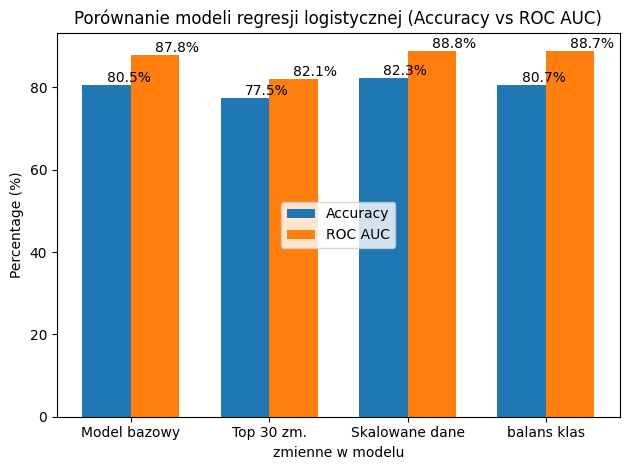

In [ ]:
models = ['Model bazowy', 'Top 30 zm.', 'Skalowane dane', 'balans klas']
accuracy = [80.5, 77.483, 82.308, 80.7]
auc = [87.78, 82.071, 88.811, 88.738]
f1 = [60.985,50.62,71.7]

# Set up the bar width
bar_width = 0.35
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots()

# Bars for accuracy
bars1 = ax.bar(index, accuracy, bar_width, label='Accuracy')

# Bars for AUC
bars2 = ax.bar(index + bar_width, auc, bar_width, label='ROC AUC')

# Add labels, title, and legend
ax.set_xlabel('zmienne w modelu')
ax.set_ylabel('Percentage (%)')
ax.set_title('Porównanie modeli regresji logistycznej (Accuracy vs ROC AUC)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

ax.yaxis.get_major_formatter().set_useOffset(False)


# Add percentage labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f}%', va='bottom')

# Show the plot
ax.legend(loc=10)
plt.tight_layout()
plt.show()

In [ ]:
param_grid = {
    'C': [0.01, 0.1,0.5, 1]  # Inverse of regularization strength
}

In [ ]:
lasso_log_reg = LogisticRegression(
    penalty='l1',
    solver='saga',  # 'saga' or 'liblinear' solver supports L1 regularization
    max_iter=10000  # Increase max_iter if convergence issues arise
)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=lasso_log_reg,
    param_grid=param_grid,
    scoring=scoring,  # Use accuracy as the scoring method
    cv=kfold,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

In [ ]:
# Fit GridSearchCV on the SMOTE resampled training data
grid_search.fit(X_train_res_smote, y_train_res_smote)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [ ]:
best_c=best_model.get_params()['C']

In [ ]:
param_grid = {
    'C': [best_c*0.75,best_c*0.9,best_c,best_c*1.1,best_c*1,25]  # Inverse of regularization strength
}

In [ ]:
grid_search.fit(X_train_res_smote, y_train_res_smote)

GridSearchCV(cv=KFold(n_splits=5, random_state=1973, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='saga'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 0.5, 1]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# simple_eval(best_model.predict(X_test_scaled[:,1])>0.5,y_test)

In [ ]:
y_train = df['churn_label']
X_train = df.drop(columns=['churn_label'])

X_test = holdout_df.drop(columns=['churn_label'])
y_test = holdout_df['churn_label']

selector = SelectKBest(mutual_info_classif, k=30)

X_train_mi = selector.fit_transform(X_train, y_train)
X_test_mi = selector.transform(X_test)


In [ ]:
# Train the first logistic regression model
model1 = LogisticRegression(max_iter=10000)
model1.fit(X_train_res_smote, y_train_res_smote)

# Train the second logistic regression model
model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train, y_train)

model3 = LogisticRegression(max_iter=10000)
model3.fit(X_train_scaled, y_train)

model4 = LogisticRegression(max_iter=10000)
model4.fit(X_train_mi, y_train)


LogisticRegression(max_iter=10000)

In [ ]:
# simple_eval(model3.predict_proba(X_test_scaled),y_test)

In [ ]:
y_pred_prob1 = model1.predict_proba(X_test_scaled)[:, 1]

# Predictions for the second model
y_pred_prob2 = model2.predict_proba(X_test)[:, 1]

y_pred_prob3 = model3.predict_proba(X_test_scaled)[:, 1]

y_pred_prob4 = model4.predict_proba(X_test_mi)[:, 1]


# Create DataFrames to manage probabilities and true labels
df1 = pd.DataFrame({'y_true': y_test, 'y_pred_prob': y_pred_prob1})
df2 = pd.DataFrame({'y_true': y_test, 'y_pred_prob': y_pred_prob2})
df3 = pd.DataFrame({'y_true': y_test, 'y_pred_prob': y_pred_prob3})
df4 = pd.DataFrame({'y_true': y_test, 'y_pred_prob': y_pred_prob4})



# Sort by predicted probabilities in descending order
df1 = df1.sort_values('y_pred_prob', ascending=False)
df2 = df2.sort_values('y_pred_prob', ascending=False)
df3 = df3.sort_values('y_pred_prob', ascending=False)
df4 = df4.sort_values('y_pred_prob', ascending=False)

In [ ]:
simple_eval(model2.predict_proba(X_test),y_test)

Model Performance: 
    Accuracy = 80.511%
    Recall = 55.326%
    Precision = 67.932%
    F1 Score = 60.985%
    AUC = 87.784%
    


In [ ]:
n_group = int(0.1 * len(df1))

# Initialize lists to store accuracy and F1 scores for each group
accuracy_model1_groups = []
f1_model1_groups = []
accuracy_model2_groups = []
f1_model2_groups = []
accuracy_model3_groups = []
f1_model3_groups = []
accuracy_model4_groups = []
f1_model4_groups = []

# Evaluate performance in each 5% group
for i in range(10):
    df1_group = df1.iloc[i*n_group:(i+1)*n_group]
    df2_group = df2.iloc[i*n_group:(i+1)*n_group]
    df3_group = df3.iloc[i*n_group:(i+1)*n_group]
    df4_group = df4.iloc[i*n_group:(i+1)*n_group]


    # Convert predicted probabilities to binary outcomes using a threshold of 0.5
    y_pred1_group = (df1_group['y_pred_prob'] >= 0.5).astype(int)
    y_pred2_group = (df2_group['y_pred_prob'] >= 0.5).astype(int)
    y_pred3_group = (df3_group['y_pred_prob'] >= 0.5).astype(int)
    y_pred4_group = (df4_group['y_pred_prob'] >= 0.5).astype(int)



    # Calculate accuracy and F1 score for each group
    accuracy_model1_groups.append(accuracy_score(df1_group['y_true'], y_pred1_group))
    f1_model1_groups.append(precision_score(df1_group['y_true'], y_pred1_group))

    accuracy_model2_groups.append(accuracy_score(df2_group['y_true'], y_pred2_group))
    f1_model2_groups.append(precision_score(df2_group['y_true'], y_pred2_group))

    accuracy_model3_groups.append(accuracy_score(df3_group['y_true'], y_pred3_group))
    f1_model3_groups.append(precision_score(df3_group['y_true'], y_pred3_group))

    accuracy_model4_groups.append(accuracy_score(df4_group['y_true'], y_pred4_group))
    f1_model4_groups.append(precision_score(df4_group['y_true'], y_pred4_group))

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill

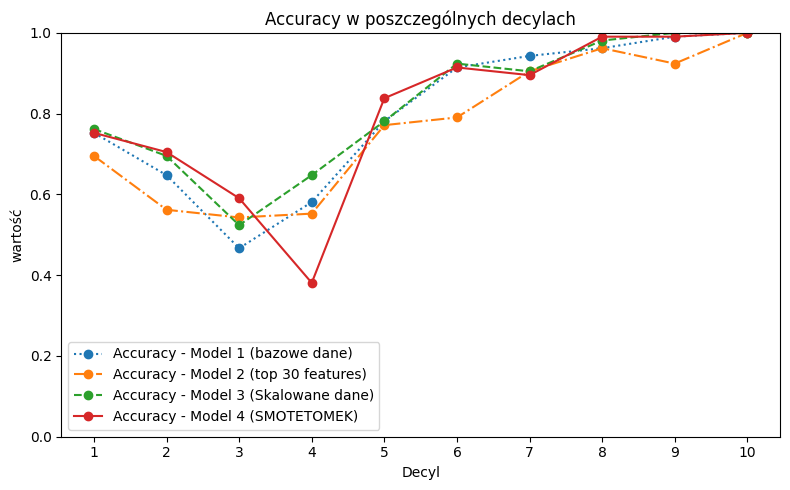

In [ ]:
groups = np.arange(1, 11)


plt.figure(figsize=(8, 5))

# Accuracy comparison
plt.plot(groups, accuracy_model2_groups, label='Accuracy - Model 1 (bazowe dane)', marker='o',linestyle='dotted')
plt.plot(groups, accuracy_model4_groups, label='Accuracy - Model 2 (top 30 features)', marker='o',linestyle='dashdot')
plt.plot(groups, accuracy_model3_groups, label='Accuracy - Model 3 (Skalowane dane)', marker='o',linestyle='dashed')
plt.plot(groups, accuracy_model1_groups, label='Accuracy - Model 4 (SMOTETOMEK)', marker='o')



# # F1 Score comparison
# plt.plot(groups, f1_model1_groups, label='F1 Score - Model 3 (Resampled)', marker='o')
# plt.plot(groups, f1_model2_groups, label='F1 Score - Model 1 (Original)', marker='o',linestyle='dotted')
# plt.plot(groups, f1_model3_groups, label='F1 Score - Model 2 (Original)', marker='o',linestyle='dashed')


# Labels, title, and limits
plt.xlabel('Decyl')
plt.ylabel('wartość')
plt.title('Accuracy w poszczególnych decylach')
plt.xticks(groups)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better comparison
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_test.value_counts()

churn_label
False    766
True     291
Name: count, dtype: int64

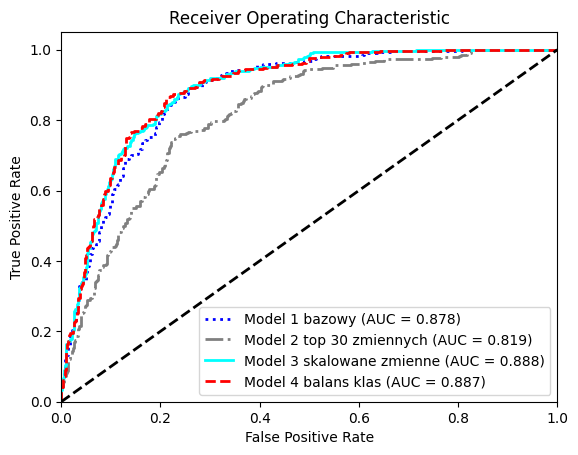

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_prob3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_prob4)

# Calculate AUC values
auc1 = roc_auc_score(y_test, y_pred_prob1)
auc2 = roc_auc_score(y_test, y_pred_prob2)
auc3 = roc_auc_score(y_test, y_pred_prob3)
auc4 = roc_auc_score(y_test, y_pred_prob4)

# Plot ROC curves
plt.figure()
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'Model 1 bazowy (AUC = {round(auc2, 3)})', linestyle=':')
plt.plot(fpr4, tpr4, color='gray', lw=2, label=f'Model 2 top 30 zmiennych (AUC = {round(auc4, 3)})', linestyle='-.')
plt.plot(fpr3, tpr3, color='cyan', lw=2, label=f'Model 3 skalowane zmienne (AUC = {round(auc3, 3)})', linestyle='-')
plt.plot(fpr1, tpr1, color='red', lw=2, label=f'Model 4 balans klas (AUC = {round(auc1, 3)})', linestyle='--')
# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# RANDOM FOREST

In [ ]:
rf_model=RandomForestClassifier(random_state=1973)

In [ ]:
rf_model1 = RandomForestClassifier(random_state=1973)
rf_model1.fit(X_train_res_smote, y_train_res_smote)

RandomForestClassifier(random_state=1973)

In [ ]:
y_pred_proba_rf1 = rf_model1.predict_proba(X_test_scaled)

Model Performance: 
    Accuracy = 82.025%
    Recall = 70.103%
    Precision = 66.45%
    F1 Score = 68.227%
    
AUC = 88.509%


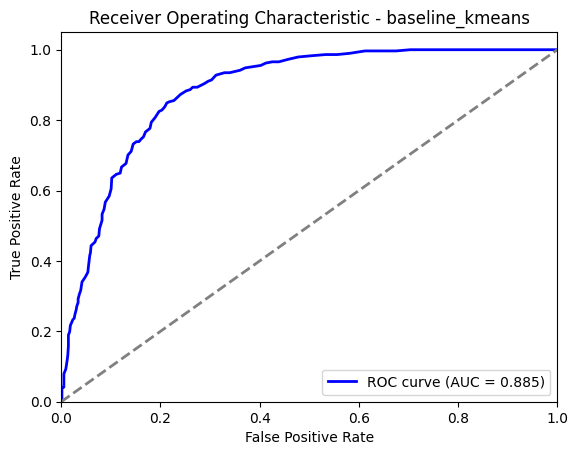

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.820246,0.701031,0.664495,0.682274,0.885091


In [ ]:
evaluate_model(y_pred_proba_rf1,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [ ]:
rf_model2 = RandomForestClassifier(random_state=1973)
rf_model2.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1973)

In [ ]:
y_pred_proba_rf2 = rf_model2.predict_proba(X_test_scaled)

In [ ]:
evaluate_model(y_pred_proba_rf2,y_test,ret_df=True,plot_roc=False,name='baseline_kmeans')

Model Performance: 
    Accuracy = 80.605%
    Recall = 52.921%
    Precision = 69.369%
    F1 Score = 60.039%
    


,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.806055,0.52921,0.693694,0.60039,0.872727


Model Performance: 
    Accuracy = 81.268%
    Recall = 51.89%
    Precision = 72.249%
    F1 Score = 60.4%
    
AUC = 88.084%


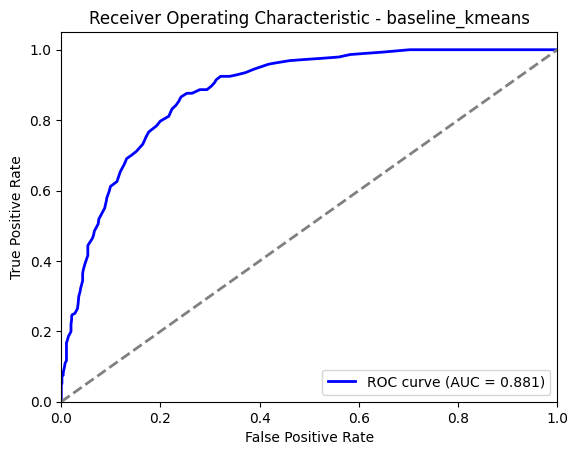

In [ ]:
rf_model3 = RandomForestClassifier(random_state=1973,class_weight='balanced')
rf_model3.fit(X_train_scaled, y_train)
y_pred_proba_rf3 = rf_model3.predict_proba(X_test_scaled)
evaluate_model(y_pred_proba_rf3,y_test,ret_df=False,plot_roc=True,name='baseline_kmeans')

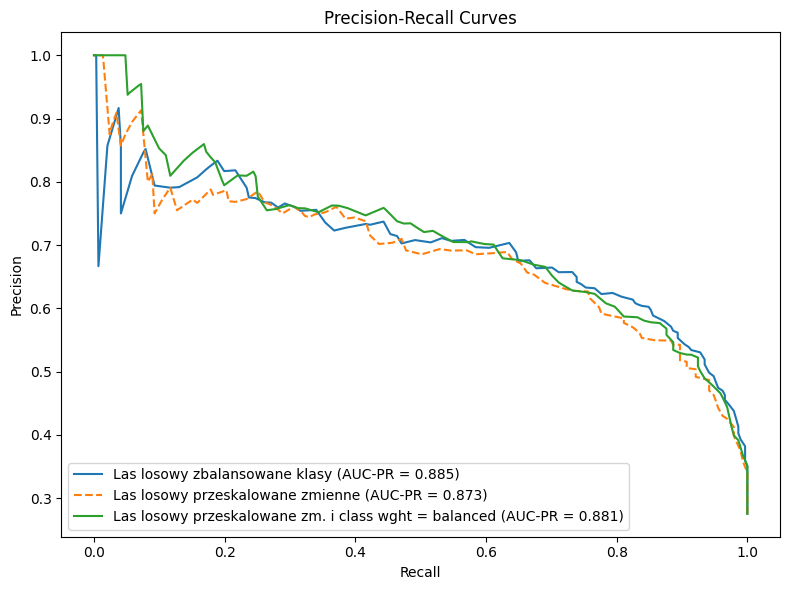

In [ ]:
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_proba_rf1[:,1])
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba_rf2[:,1])
precision3, recall3, _ = precision_recall_curve(y_test, y_pred_proba_rf3[:,1])

# Calculate AUC for Precision-Recall curves
auc_pr1 = roc_auc_score(y_test, y_pred_proba_rf1[:,1])
auc_pr2 = roc_auc_score(y_test, y_pred_proba_rf2[:,1])
auc_pr3 = roc_auc_score(y_test, y_pred_proba_rf3[:,1])

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall1, precision1, label=f'Las losowy zbalansowane klasy (AUC-PR = {auc_pr1:.3f})', linestyle='solid')
plt.plot(recall2, precision2, label=f'Las losowy przeskalowane zmienne (AUC-PR = {auc_pr2:.3f})', linestyle='dashed')
plt.plot(recall3, precision3, label=f'Las losowy przeskalowane zm. i class wght = balanced (AUC-PR = {auc_pr3:.3f})', linestyle='-')


# Labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1973,
 'verbose': 0,
 'warm_start': False}

In [ ]:
base_grid_rf = {
    'n_estimators': np.arange(100, 1100, 200),
    'max_depth': np.arange(10, 50, 10),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Initialize GridSearchCV with the base grid
grid_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=base_grid_rf,
    scoring=scoring,  # or use your preferred scoring metric
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=1973
)

# Fit the grid search
grid_search_rf.fit(X_train_res_smote, y_train_res_smote)

# Get the best parameters from the grid search
best_params_from_grid = grid_search_rf.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
y_pred_proba_rf_grid = grid_search_rf.best_estimator_.predict_proba(X_test_scaled)

Model Performance: 
    Accuracy = 82.308%
    Recall = 70.447%
    Precision = 66.993%
    F1 Score = 68.677%
    
AUC = 88.586%


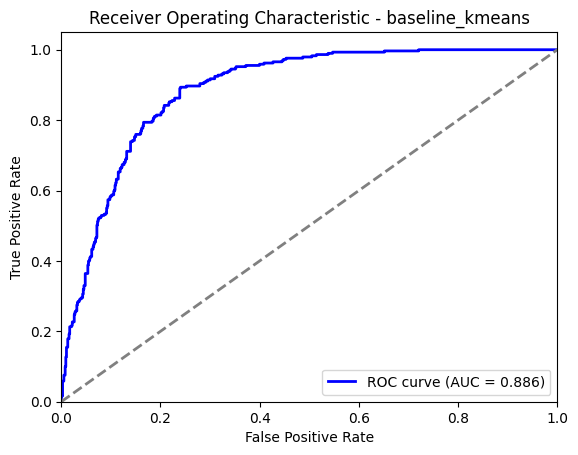

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.823084,0.704467,0.669935,0.686767,0.88586


In [ ]:
evaluate_model(y_pred_proba_rf_grid,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [ ]:
best_params_from_grid=grid_search_rf.best_estimator_.get_params()

In [ ]:
best_params_from_grid

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 700,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1973,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Expanded grid based on best parameters from the first grid search
refined_grid_rf = {
    'n_estimators': np.unique(np.arange(max(100, best_params_from_grid['n_estimators'] - 200), best_params_from_grid['n_estimators'] + 200, 100)),
    'max_depth': np.unique(np.arange(max(10, best_params_from_grid['max_depth'] - 10), min(50, best_params_from_grid['max_depth'] + 20), 4)),
    'min_samples_split': np.unique(np.arange(max(2, best_params_from_grid['min_samples_split'] - 2), best_params_from_grid['min_samples_split'] + 2, 1)),
    'min_samples_leaf': np.unique(np.arange(max(1, best_params_from_grid['min_samples_leaf'] - 1), best_params_from_grid['min_samples_leaf'] + 2, 1)),
    'max_features': [best_params_from_grid['max_features']],
    'bootstrap': [best_params_from_grid['bootstrap']]
}

# Initialize GridSearchCV with the refined grid
refined_grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=refined_grid_rf,
    scoring=scoring,  # or your preferred scoring metric
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    # random_state=1973
)

# Fit the refined grid search
refined_grid_search_rf.fit(X_train_res_smote, y_train_res_smote)

# Evaluate the best model from the refined grid search
best_model_rf = refined_grid_search_rf.best_estimator_
y_pred_proba_rf_refined_grid = best_model_rf.predict_proba(X_test_scaled)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
best_model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1973,
 'verbose': 0,
 'warm_start': False}

Model Performance: 
    Accuracy = 82.403%
    Recall = 69.416%
    Precision = 67.559%
    F1 Score = 68.475%
    
AUC = 88.658%


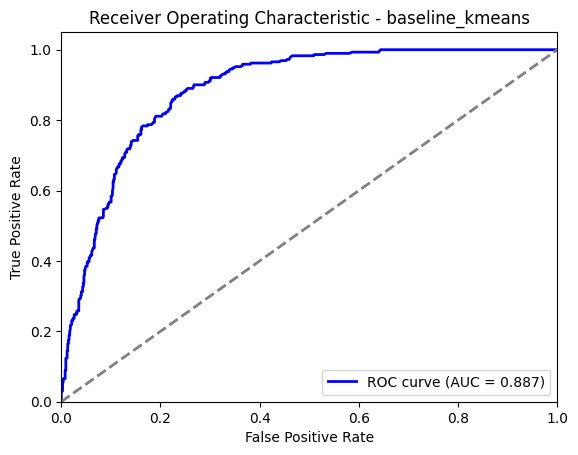

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.82403,0.694158,0.675585,0.684746,0.886584


In [ ]:
evaluate_model(y_pred_proba_rf_refined_grid,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

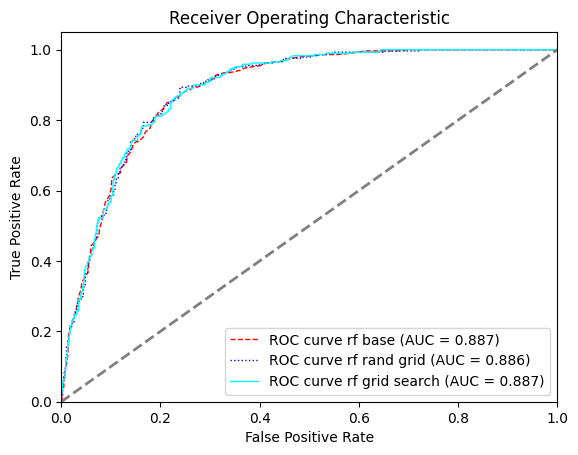

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba_rf1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba_rf_grid[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba_rf_refined_grid[:,1])

auc1 = roc_auc_score(y_test, y_pred_proba[:,1])
auc2 = roc_auc_score(y_test, y_pred_proba_rf_grid[:,1])
auc3 = roc_auc_score(y_test, y_pred_proba_rf_refined_grid[:,1])




plt.figure()
plt.plot(fpr1, tpr1, color='red', lw=1, label=f'ROC curve rf base (AUC = {round(auc1, 3)})',linestyle='--')
plt.plot(fpr2, tpr2, color='blue', lw=1, label=f'ROC curve rf rand grid (AUC = {round(auc2, 3)})',linestyle=':')
plt.plot(fpr3, tpr3, color='cyan', lw=1, label=f'ROC curve rf grid search (AUC = {round(auc3, 3)})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
# print(f'AUC = {round(auc*100, 3)}%')

# # Annotate the thresholds
# for i in range(len(thresholds)):
#     plt.annotate(f'{round(thresholds[i], 2)}',
#                 xy=(fpr[i], tpr[i]),
#                 textcoords='offset points',
#                 xytext=(0, 10),
#                 ha='center')

plt.show()

In [ ]:
# {'bootstrap': True,
#  'ccp_alpha': 0.0,
#  'class_weight': None,
#  'criterion': 'gini',
#  'max_depth': 30,
#  'max_features': 'auto',
#  'max_leaf_nodes': None,
#  'max_samples': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 800,
#  'n_jobs': None,
#  'oob_score': False,
#  'random_state': 1973,
#  'verbose': 0,
#  'warm_start': False}

In [ ]:
best_rf=RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 30,
 max_features = 'auto',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 800,
 n_jobs = None,
 oob_score = False,
 random_state = 1973,
 verbose = 0,
 warm_start = False)

In [ ]:
best_rf.fit(X_train_res_smote,y_train_res_smote)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=30, max_features='auto', n_estimators=800,
                       random_state=1973)

In [ ]:
evaluate_model(best_rf.predict_proba(X_test_scaled),y_test,ret_df=True)

Model Performance:
    Accuracy = 82.403%
    Recall = 69.416%
    Precision = 67.559%
    F1 Score = 68.475%
    


,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.82403,0.694158,0.675585,0.684746,0.886584


In [ ]:
best_rf.feature_importances_

array([0.01247872, 0.03305904, 0.00529251, 0.00579188, 0.00858052,
       0.02996655, 0.03751392, 0.00699771, 0.09243543, 0.00218349,
       0.03316914, 0.01189041, 0.01179582, 0.0455954 , 0.03549906,
       0.01491808, 0.01034552, 0.02469042, 0.01021416, 0.00634683,
       0.00689941, 0.01063003, 0.04090638, 0.0531066 , 0.05546721,
       0.00538736, 0.00731572, 0.04418222, 0.05941614, 0.03807422,
       0.00142975, 0.0031743 , 0.00199493, 0.00329036, 0.00615834,
       0.00751827, 0.00376094, 0.00955057, 0.04034571, 0.0103963 ,
       0.01431485, 0.02570333, 0.00318175, 0.0071753 , 0.02454989,
       0.00983826, 0.02992351, 0.03115519, 0.00203938, 0.00203898,
       0.00231019])

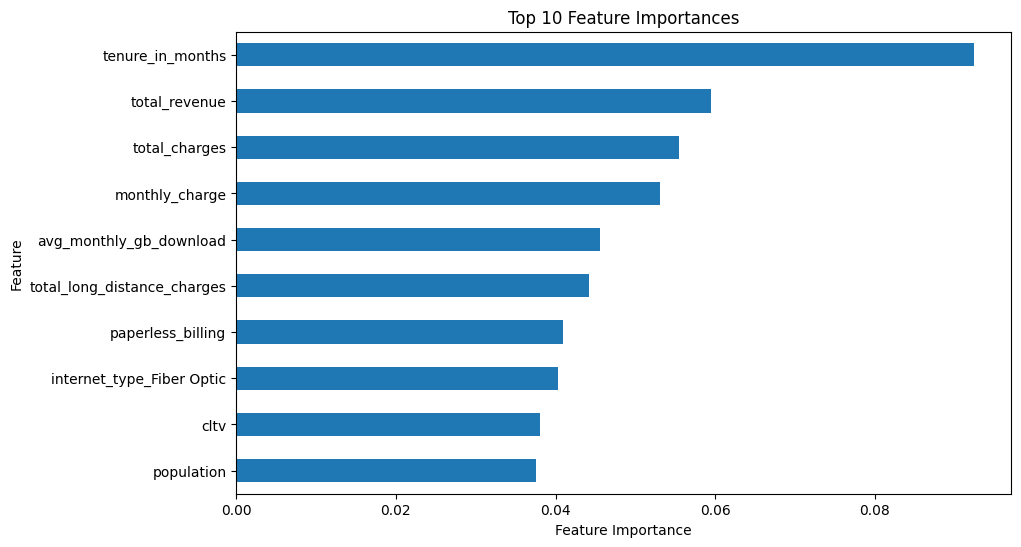

In [ ]:
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a pandas series with the feature importances and corresponding feature names
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the series in descending order and select the top 10 features
top_10_importances = importance_series.sort_values(ascending=False).head(10)

# Plotting the top 10 feature importances
plt.figure(figsize=(10, 6))
top_10_importances.plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

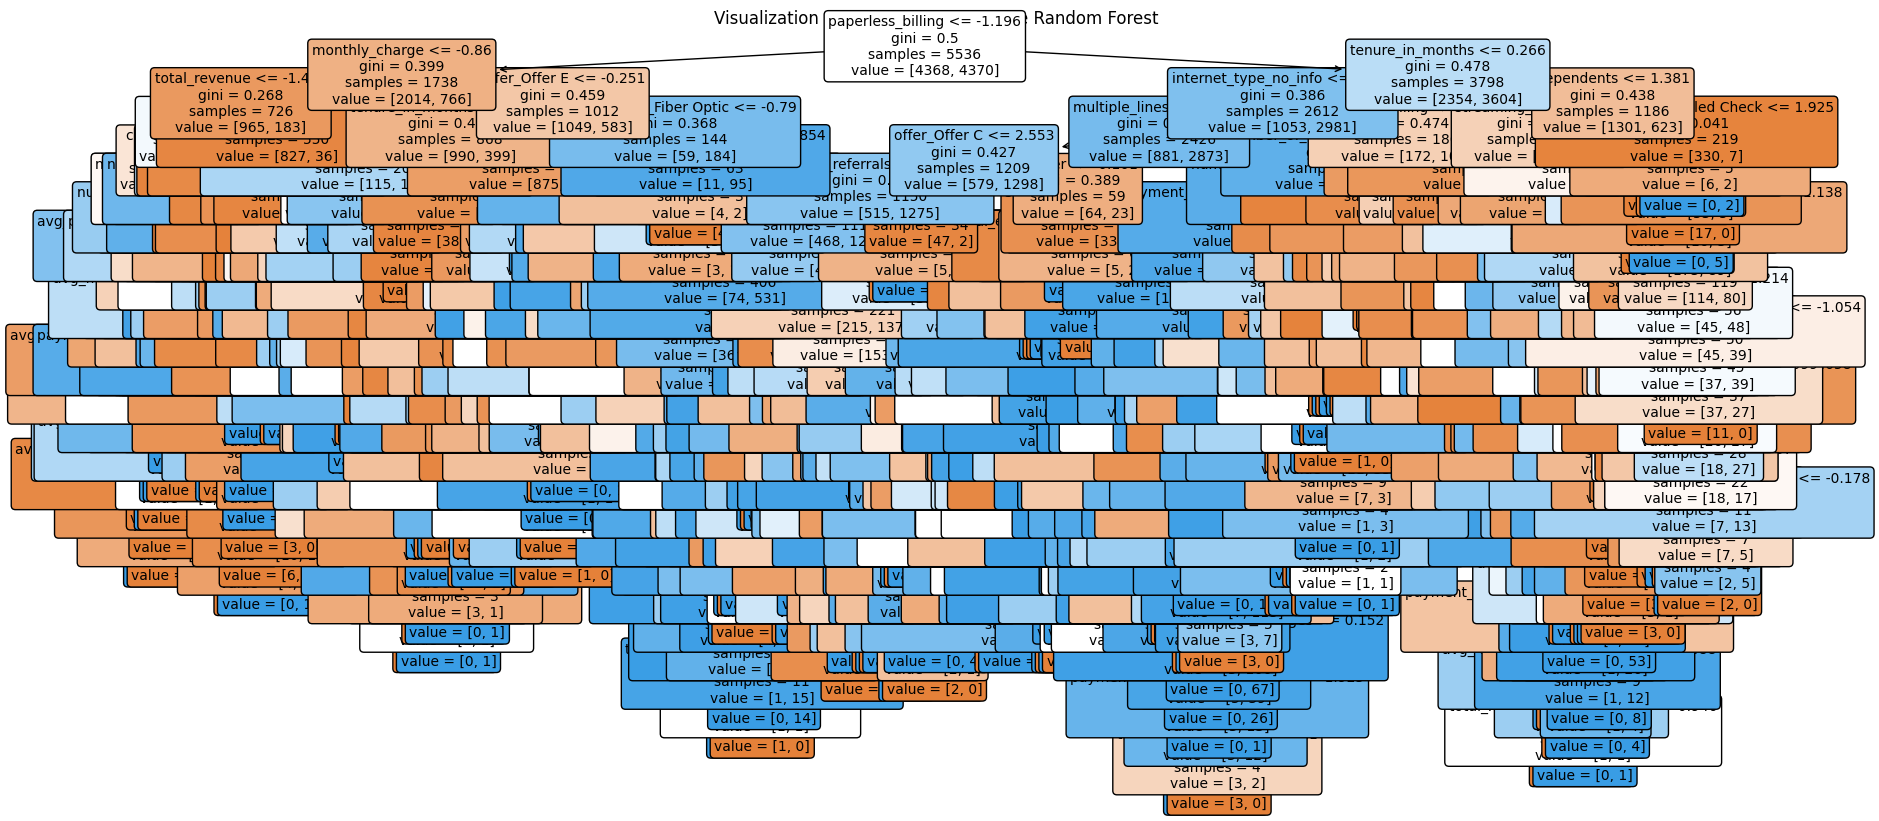

In [ ]:
plt.figure(figsize=(20, 10))

# Select the first tree from the Random Forest
tree = best_rf.estimators_[10]

# Plot the tree
plot_tree(tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)

plt.title('Visualization of a Single Tree from the Random Forest')
plt.show()

# XGB

In [ ]:
model1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric=scoring)
model1.fit(X_train_res_smote, y_train_res_smote)

# Create and train the second XGBoost model on the scaled original data
model2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric=scoring)
model2.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=make_scorer(roc_auc_score, needs_proba=True),
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
proba1=model1.predict_proba(X_test_scaled)
proba2=model2.predict_proba(X_test_scaled)

In [ ]:
evaluate_model(proba1,y_test,ret_df=True)

Model Performance: 
    Accuracy = 80.7%
    Recall = 62.543%
    Precision = 65.704%
    F1 Score = 64.085%
    


,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.807001,0.62543,0.65704,0.640845,0.86912


In [ ]:
evaluate_model(proba2,y_test,ret_df=True)

Model Performance: 
    Accuracy = 80.416%
    Recall = 58.419%
    Precision = 66.406%
    F1 Score = 62.157%
    


,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.804163,0.584192,0.664062,0.621572,0.865378


In [ ]:
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3,log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0,log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 10.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1e-1,log=True),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1e-1,log=True),  # L2 regularization
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
    }

    model = xgb.XGBClassifier(**param, use_label_encoder=False, eval_metric='auc')
    return cross_val_score(model, X_train_res_smote, y_train_res_smote, cv=kfold, scoring=scoring).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters found: ", study.best_params)
print("Best accuracy score: ", study.best_value)

[I 2024-09-02 14:50:54,690] A new study created in memory with name: no-name-003a06b7-7eda-42a7-9987-8a4f4e858584
[I 2024-09-02 14:53:06,931] Trial 0 finished with value: 0.9551043410514997 and parameters: {'n_estimators': 130, 'max_depth': 15, 'learning_rate': 0.19554133882163666, 'subsample': 0.7094376423299585, 'colsample_bytree': 0.9121260346209124, 'gamma': 0.32451640343986915, 'min_child_weight': 4, 'scale_pos_weight': 0.9318325503502529, 'reg_alpha': 0.005407354368278498, 'reg_lambda': 0.0015031904825881508, 'booster': 'dart'}. Best is trial 0 with value: 0.9551043410514997.
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [14:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsa

KeyboardInterrupt: 

In [ ]:
study.best_params

{'n_estimators': 451,
 'max_depth': 15,
 'learning_rate': 0.021420858706817966,
 'subsample': 0.7782125617411527,
 'colsample_bytree': 0.6258730368973217,
 'gamma': 0.3063165403401615,
 'min_child_weight': 1,
 'scale_pos_weight': 5.979336482716175,
 'reg_alpha': 0.003724323503783414,
 'reg_lambda': 0.07247559915466978,
 'booster': 'dart'}

In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_booster,params_colsample_bytree,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_reg_alpha,params_reg_lambda,params_scale_pos_weight,params_subsample,state
0,0,0.955104,2024-09-02 14:50:54.692990,2024-09-02 14:53:06.930408,0 days 00:02:12.237418,dart,0.912126,0.324516,0.195541,15,4,130,0.005407,0.001503,0.931833,0.709438,COMPLETE
1,1,0.893767,2024-09-02 14:53:06.934452,2024-09-02 14:53:08.465263,0 days 00:00:01.530811,gblinear,0.936108,0.199827,0.089970,15,3,179,0.000018,0.000086,4.381208,0.756793,COMPLETE
2,2,0.957214,2024-09-02 14:53:08.468261,2024-09-02 14:53:21.195051,0 days 00:00:12.726790,gbtree,0.930215,0.317795,0.093855,11,3,218,0.024348,0.000017,0.947384,0.509859,COMPLETE
3,3,0.960687,2024-09-02 14:53:21.199057,2024-09-02 14:53:42.096411,0 days 00:00:20.897354,gbtree,0.588951,0.219464,0.025001,9,2,336,0.036014,0.004579,3.025303,0.727220,COMPLETE
4,4,0.953144,2024-09-02 14:53:42.099409,2024-09-02 14:53:48.952962,0 days 00:00:06.853553,gbtree,0.957451,0.788788,0.225631,13,9,92,0.005289,0.001363,6.795870,0.599490,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,0.962559,2024-09-02 20:18:00.835908,2024-09-02 21:02:15.713900,0 days 00:44:14.877992,dart,0.526896,0.582152,0.015689,14,1,467,0.003479,0.068610,6.737656,0.798134,COMPLETE
60,60,0.961720,2024-09-02 21:02:15.716898,2024-09-02 21:37:36.043335,0 days 00:35:20.326437,dart,0.593655,0.657693,0.011861,15,1,500,0.001685,0.000084,5.723063,0.802474,COMPLETE
61,61,0.962438,2024-09-02 21:37:36.064334,2024-09-02 22:10:13.708922,0 days 00:32:37.644588,dart,0.522442,0.513489,0.015469,14,1,465,0.009531,0.067744,6.770727,0.853504,COMPLETE
62,62,0.962301,2024-09-02 22:10:13.717922,2024-09-02 22:52:02.607179,0 days 00:41:48.889257,dart,0.531057,0.504642,0.015793,14,1,432,0.003337,0.032952,6.862973,0.837101,COMPLETE


In [ ]:
# {'n_estimators': 451, 'max_depth': 15, 'learning_rate': 0.021420858706817966, 'subsample': 0.7782125617411527, 'colsample_bytree': 0.6258730368973217, 'gamma': 0.3063165403401615, 'min_child_weight': 1, 'scale_pos_weight': 5.979336482716175, 'reg_alpha': 0.003724323503783414, 'reg_lambda': 0.07247559915466978, 'booster': 'dart'}

In [ ]:
optuna_xgb=xgb.XGBClassifier(n_estimators = 451, max_depth = 15, learning_rate = 0.021420858706817966, subsample = 0.7782125617411527,
                               colsample_bytree = 0.6258730368973217, gamma = 0.3063165403401615, min_child_weight = 1, scale_pos_weight = 5.979336482716175,
                                 reg_alpha = 0.003724323503783414, reg_lambda = 0.07247559915466978, booster = 'dart')

In [ ]:
optuna_xgb.fit(X_train_res_smote,y_train_res_smote)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6258730368973217, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3063165403401615,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.021420858706817966,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=451, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
evaluate_model(optuna_xgb.predict_proba(X_test_scaled),y_test,ret_df=True)

Model Performance:
    Accuracy = 80.795%
    Recall = 74.57%
    Precision = 62.717%
    F1 Score = 68.132%
    


,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.807947,0.745704,0.627168,0.681319,0.882089


In [ ]:
# param_grid = {
#     'n_estimators': [445, 450, 455],  # Exploring around the given value
#     # 'max_depth': [14, 15, 16],  # Exploring around the given value
#     # 'learning_rate': [0.019, 0.021, 0.023],  # Narrow range around the given value
#     'subsample': [0.76, 0.8, 0.8],  # Exploring around the given value
#     'colsample_bytree': [0.62, 0.625, 0.63],  # Exploring around the given value
#     # 'gamma': [0.295, 0.306, 0.315],  # Narrow range around the given value
#     'min_child_weight': [1],  # Keeping this fixed as given
#     'scale_pos_weight': [5.85, 5.979, 6.05],  # Exploring around the given value
#     # 'reg_alpha': [0.00365, 0.00372, 0.00378],  # Narrow range around the given value
#     # 'reg_lambda': [0.069, 0.072, 0.075],  # Exploring around the given value
#     'booster': ['dart']  # Keeping this fixed as given
# }

# # Initialize the XGBoost classifier
# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')

# # Set up the GridSearchCV with the specified parameters
# grid_search = (estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, verbose=1, n_jobs=-1)

# # Fit the grid search on the training data (assuming X_train and y_train are defined)
# grid_search.fit(X_train_res_smote, y_train_res_smote)

# # Output the best parameters and the best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy score: ", grid_search.best_score_)

Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


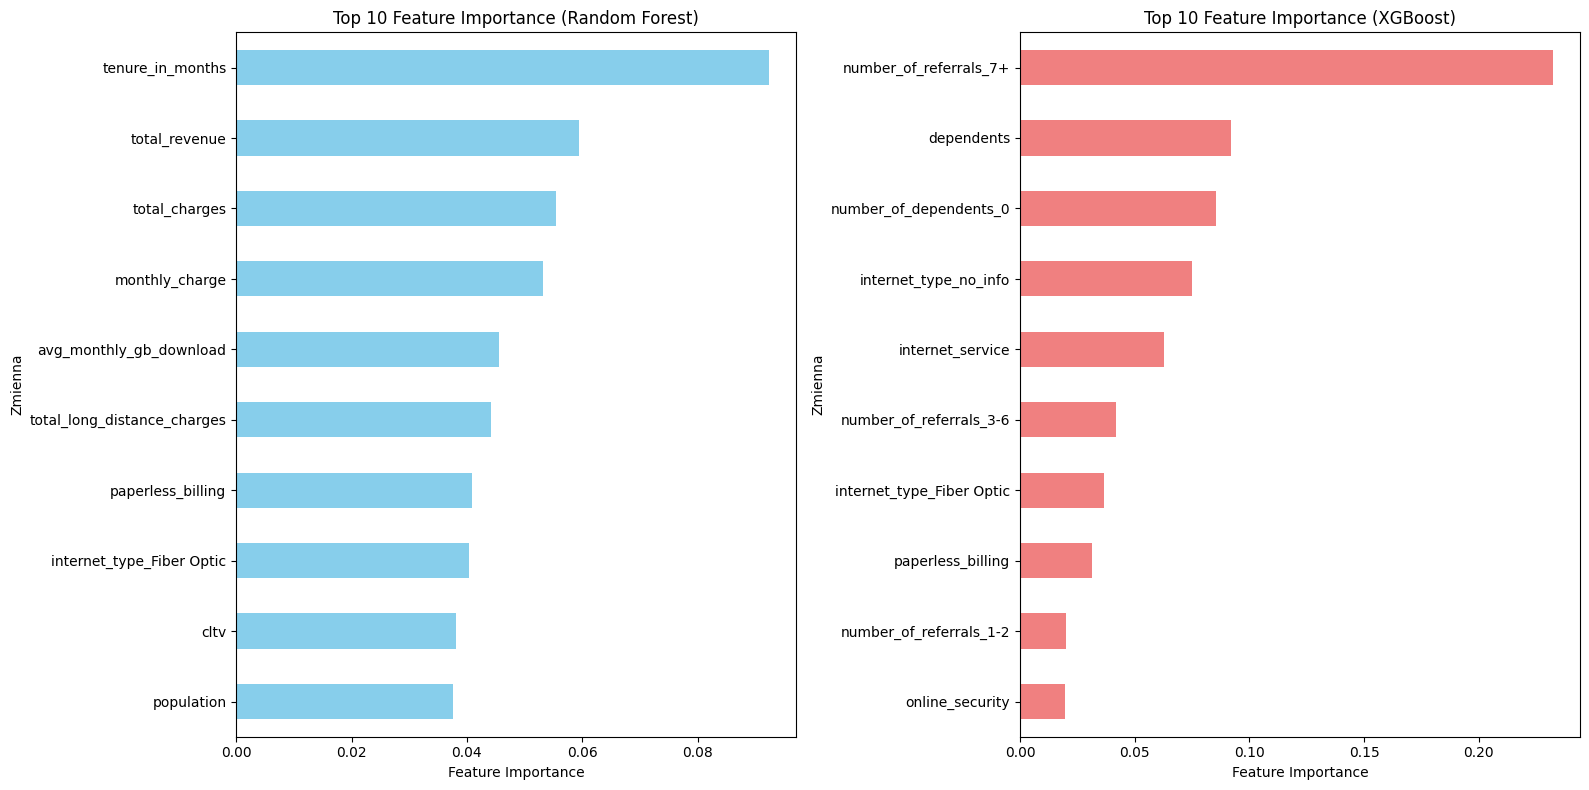

In [ ]:
rf_importances = best_rf.feature_importances_
xgb_importances = optuna_xgb.feature_importances_
feature_names = X_train.columns

# Create pandas series with the feature importances and corresponding feature names
rf_importance_series = pd.Series(rf_importances, index=feature_names)
xgb_importance_series = pd.Series(xgb_importances, index=feature_names)

# Sort the series in descending order and select the top 10 features
top_10_rf = rf_importance_series.sort_values(ascending=False).head(10)
top_10_xgb = xgb_importance_series.sort_values(ascending=False).head(10)

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Random Forest
top_10_rf.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Feature Importance (Random Forest)')
axes[0].set_xlabel('Feature Importance')
axes[0].set_ylabel('Zmienna')
axes[0].invert_yaxis()  # Invert y-axis to have the most important feature on top

# Plot for XGBoost
top_10_xgb.plot(kind='barh', ax=axes[1], color='lightcoral')
axes[1].set_title('Top 10 Feature Importance (XGBoost)')
axes[1].set_xlabel('Feature Importance')
axes[1].set_ylabel('Zmienna')
axes[1].invert_yaxis()  # Invert y-axis to have the most important feature on top

plt.tight_layout()
plt.show()

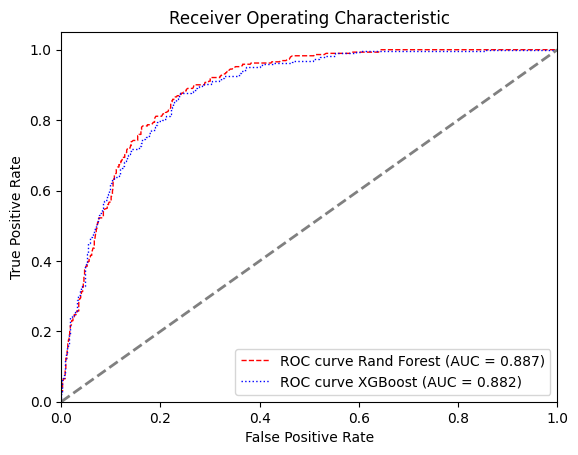

In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, optuna_xgb.predict_proba(X_test_scaled)[:, 1])

auc1 = roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1])
auc2 = roc_auc_score(y_test, optuna_xgb.predict_proba(X_test_scaled)[:, 1])




plt.figure()
plt.plot(fpr1, tpr1, color='red', lw=1, label=f'ROC curve Rand Forest (AUC = {round(auc1, 3)})',linestyle='--')
plt.plot(fpr2, tpr2, color='blue', lw=1, label=f'ROC curve XGBoost (AUC = {round(auc2, 3)})',linestyle=':')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
# print(f'AUC = {round(auc*100, 3)}%')

# # Annotate the thresholds
# for i in range(len(thresholds)):
#     plt.annotate(f'{round(thresholds[i], 2)}',
#                 xy=(fpr[i], tpr[i]),
#                 textcoords='offset points',
#                 xytext=(0, 10),
#                 ha='center')

plt.show()

In [ ]:
rf_probs = best_rf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
xgb_probs = optuna_xgb.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Compute ROC curve and ROC area for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label=f'XGBoost (AUC = {xgb_auc:.2f})')

# Plot the diagonal line for random chance
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest and XGBoost')
plt.legend(loc='lower right')

plt.show()

NameError: name 'auc' is not defined

# Neural Network

In [108]:
def evaluate_neural(y_pred_proba, y_test, ret_df=False, plot_roc=False, name='model_name'):
    # Convert probabilities to class predictions based on a threshold of 0.5
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"""Model Performance:
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    """)

    if plot_roc == True:
        # Plotting the ROC curve with different thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {round(auc, 3)})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc="lower right")
        print(f'AUC = {round(auc*100, 3)}%')

        # # Annotate the thresholds
        # for i in range(len(thresholds)):
        #     plt.annotate(f'{round(thresholds[i], 2)}',
        #                 xy=(fpr[i], tpr[i]),
        #                 textcoords='offset points',
        #                 xytext=(0, 10),
        #                 ha='center')

    plt.show()

    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1],
            'AUC': [auc]
        }
        return pd.DataFrame(metrics)

In [181]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [199]:
seed_value = 1973
np.random.seed(seed_value)  # For NumPy
tf.random.set_seed(seed_value)  # For TensorFlow
random.seed(seed_value)  # For Python random

# Step 1: Define the neural network
model = Sequential([
    Dense(X_train_res_smote.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming a binary classification task
])

# Step 2: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(X_train_res_smote, y_train_res_smote, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6054 - loss: 0.6395 - val_accuracy: 0.7168 - val_loss: 0.6493
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.4476 - val_accuracy: 0.8141 - val_loss: 0.4723
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.4023 - val_accuracy: 0.8324 - val_loss: 0.4276
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8156 - loss: 0.3852 - val_accuracy: 0.8427 - val_loss: 0.4072
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8241 - loss: 0.3751 - val_accuracy: 0.8501 - val_loss: 0.3946
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - loss: 0.3674 - val_accuracy: 0.8587 - val_loss: 0.3860
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8338 - loss: 0.3607 - val_accuracy: 0.8598 - val_loss: 0.3780
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8364 - loss: 0.3547 - val_accuracy: 0.8610 - val_loss

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Performance:
    Accuracy = 80.227%
    Recall = 73.196%
    Precision = 61.919%
    F1 Score = 67.087%
    
AUC = 87.818%


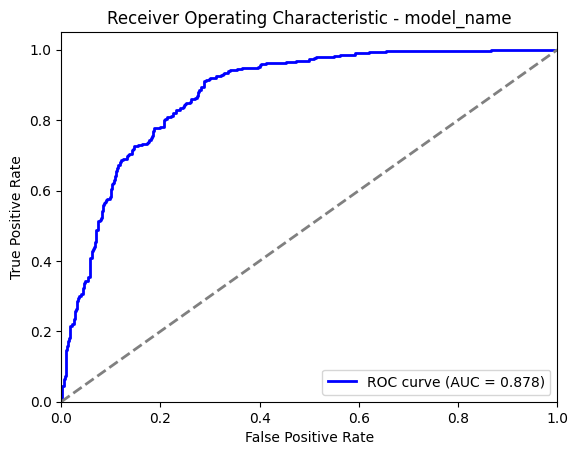

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.802271,0.731959,0.619186,0.670866,0.878177


In [202]:
evaluate_neural(model.predict(X_test_scaled),y_test,ret_df=True,plot_roc=True)

Text(0.5, 1.0, 'Wyniki modelu w zależności od liczby epochów')

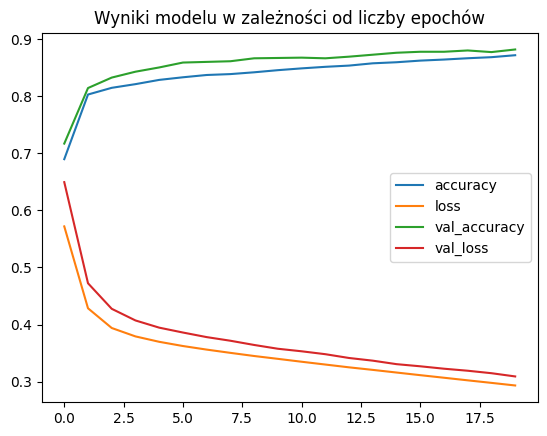

In [203]:
pd.DataFrame(history.history).plot()
plt.title('Wyniki modelu w zależności od liczby epochów')

In [216]:
seed_value = 1973
np.random.seed(seed_value)  # For NumPy
tf.random.set_seed(seed_value)  # For TensorFlow
random.seed(seed_value)  # For Python random

# Step 1: Define the neural network
model2 = Sequential([
    Dense(X_train_res_smote.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming a binary classification task
])

# Step 2: Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Use 'sparse_categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Step 3: Train the model
history2 = model2.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7312 - loss: 0.5499 - val_accuracy: 0.8038 - val_loss: 0.4372
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8190 - loss: 0.4070 - val_accuracy: 0.8130 - val_loss: 0.4011
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8372 - loss: 0.3694 - val_accuracy: 0.8088 - val_loss: 0.3931
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8476 - loss: 0.3550 - val_accuracy: 0.8155 - val_loss: 0.3901
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8462 - loss: 0.3467 - val_accuracy: 0.8155 - val_loss: 0.3893
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8464 - loss: 0.3401 - val_accuracy: 0.8205 - val_loss: 0.3894
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8488 - loss: 0.3348 - val_accuracy: 0.8205 - val_loss: 0.3898
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8504 - loss: 0.3304 - val_accuracy: 0.8155 - val_loss

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Performance:
    Accuracy = 79.565%
    Recall = 62.199%
    Precision = 63.066%
    F1 Score = 62.63%
    
AUC = 85.308%


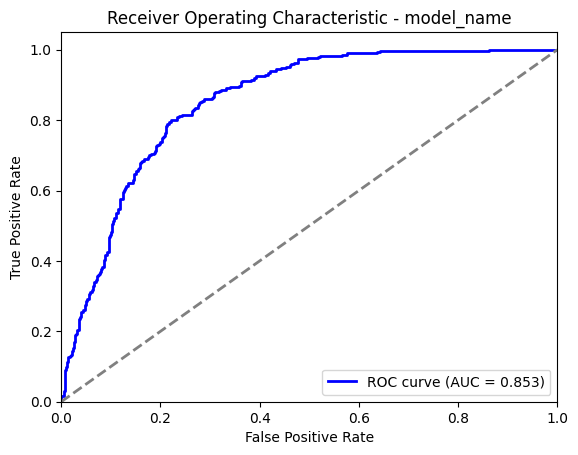

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.795648,0.621993,0.630662,0.626298,0.853077


In [217]:
evaluate_neural(model2.predict(X_test_scaled),y_test,ret_df=True,plot_roc=True)

Text(0.5, 1.0, 'Wyniki modelu w zależności od liczby epochów')

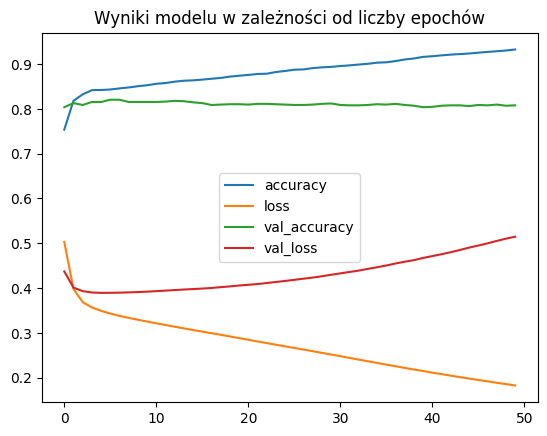

In [218]:
pd.DataFrame(history2.history).plot()
plt.title('Wyniki modelu w zależności od liczby epochów')

In [221]:
pd.DataFrame(history2.history).head(6)

,accuracy,loss,val_accuracy,val_loss
0,0.753759,0.502909,0.803840,0.437196
1,0.818087,0.397994,0.813022,0.401067
2,0.832498,0.368672,0.808848,0.393137
3,0.841896,0.356686,0.815526,0.390110
4,0.842314,0.349130,0.815526,0.389299
5,0.843358,0.343127,0.820534,0.389386


In [135]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [136]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [230]:
# model3 = Sequential([
#     Dense(X_train_res_smote.shape[1], activation='relu'),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')  # Assuming a binary classification task
# ])

model3 = Sequential([
    Dense(X_train_res_smote.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming a binary classification task
])



# Compile the model with Adam optimizer
model3.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

# Train the model
history3 = model3.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2)
                    # callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5291 - loss: 0.8636 - val_accuracy: 0.7212 - val_loss: 0.5729
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6918 - loss: 0.5966 - val_accuracy: 0.8013 - val_loss: 0.4925
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7607 - loss: 0.5201 - val_accuracy: 0.8097 - val_loss: 0.4579
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7862 - loss: 0.4736 - val_accuracy: 0.8080 - val_loss: 0.4335
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7988 - loss: 0.4542 - val_accuracy: 0.8105 - val_loss: 0.4176
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 0.4217 - val_accuracy: 0.8072 - val_loss: 0.4105
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8209 - loss: 0.4123 - val_accuracy: 0.8063 - val_loss: 0.4049
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8208 - loss: 0.4104 - val_accuracy: 0.8072 - val_loss

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model Performance:
    Accuracy = 80.038%
    Recall = 57.732%
    Precision = 65.625%
    F1 Score = 61.426%
    
AUC = 87.735%


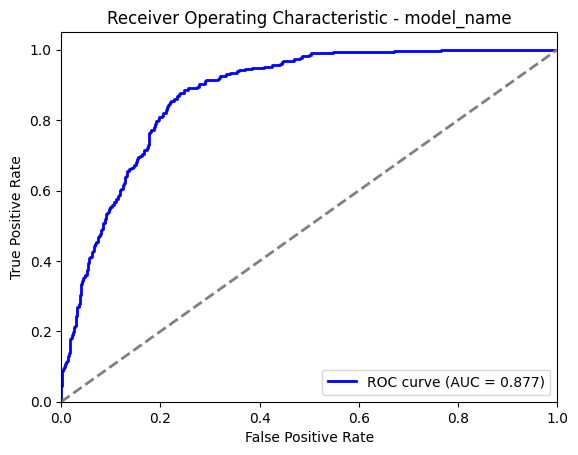

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.800378,0.57732,0.65625,0.61426,0.877352


In [231]:
evaluate_neural(model3.predict(X_test_scaled),y_test,ret_df=True,plot_roc=True)

Text(0.5, 1.0, 'Wyniki modelu2 w zależności od liczby epochów')

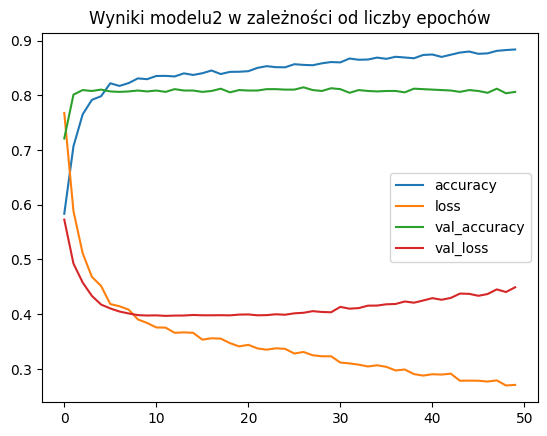

In [233]:
pd.DataFrame(history3.history).plot()
plt.title('Wyniki modelu2 w zależności od liczby epochów')

In [238]:
pd.DataFrame(history3.history).head(15).tail(5)

,accuracy,loss,val_accuracy,val_loss
10,0.835422,0.375737,0.808848,0.397828
11,0.835631,0.375447,0.806344,0.396883
12,0.834586,0.365962,0.811352,0.397436
13,0.840226,0.366714,0.808848,0.397545
14,0.837302,0.365983,0.808848,0.398549


In [246]:
model4 = Sequential([
    Dense(X_train_res_smote.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model4.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# Train the model
history4 = model4.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2,
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test data
test_loss, test_accuracy = model4.evaluate(X_test_scaled, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.5332 - loss: 0.8161 - val_accuracy: 0.7821 - val_loss: 0.5556 - learning_rate: 0.0010
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6578 - loss: 0.6253 - val_accuracy: 0.7980 - val_loss: 0.4955 - learning_rate: 0.0010
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.5519 - val_accuracy: 0.7980 - val_loss: 0.4562 - learning_rate: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.5062 - val_accuracy: 0.7980 - val_loss: 0.4366 - learning_rate: 0.0010
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7758 - loss: 0.4858 - val_accuracy: 0.8038 - val_loss: 0.4263 - learning_rate: 0.0010
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7947 - loss: 0.4602 - val_accuracy: 0.8055 - val_loss: 0.4226 - learning_rate: 0.0010
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7971 - loss: 0.4454 - val_accuracy

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Performance:
    Accuracy = 82.214%
    Recall = 63.574%
    Precision = 69.288%
    F1 Score = 66.308%
    
AUC = 88.937%


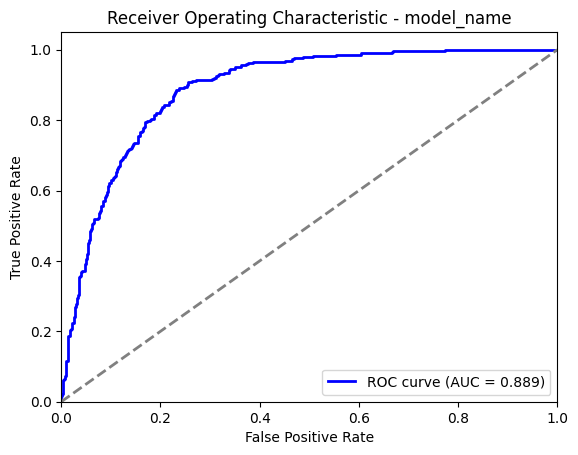

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,model_name,0.822138,0.635739,0.692884,0.663082,0.889375


In [247]:
evaluate_neural(model4.predict(X_test_scaled),y_test,ret_df=True,plot_roc=True)

In [255]:
X_train.shape

(5986, 51)

Text(0.5, 1.0, 'Wyniki modelu3 w zależności od liczby epochów')

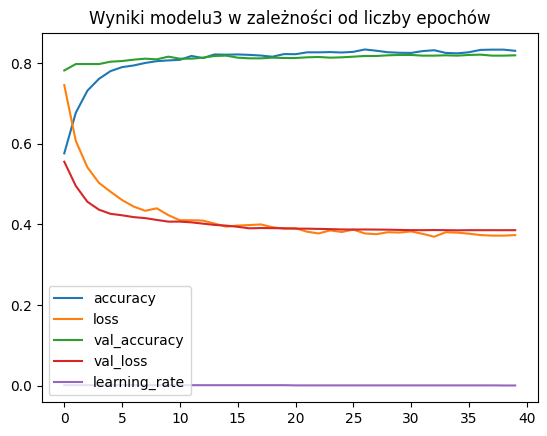

In [249]:
pd.DataFrame(history4.history).plot()
plt.title('Wyniki modelu3 w zależności od liczby epochów')

In [256]:
model4.save('model4.h5')

In [257]:
model.save('model.h5')

# sumarizing XD

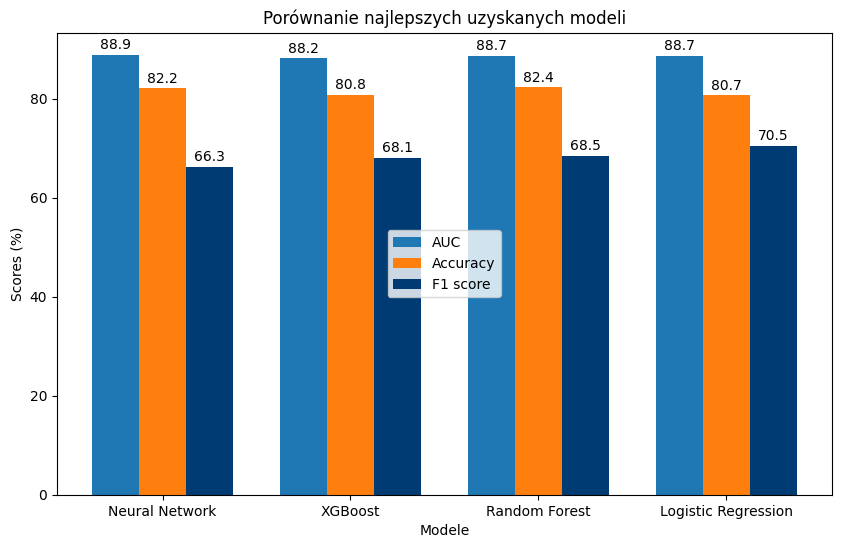

In [271]:
# Define the data for each model
models = ['Neural Network', 'XGBoost', 'Random Forest', 'Logistic Regression']
auc_scores = [88.9, 88.2, 88.7, 88.7]
accuracy_scores = [82.2, 80.8, 82.4, 80.7]
f1_scores = [66.3, 68.1, 68.5, 70.5]

# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#003b73']  # Blue, Orange, SGH Blue

# Create figure and set size
fig, ax = plt.subplots(figsize=(10, 6))

# Define the positions for the bars
bar_width = 0.25
index = np.arange(len(models))

# Plot bars for each metric with new colors
bar1 = ax.bar(index, auc_scores, bar_width, label='AUC', color=colors[0])
bar2 = ax.bar(index + bar_width, accuracy_scores, bar_width, label='Accuracy', color=colors[1])
bar3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 score', color=colors[2])

# Add labels, title, and legend
ax.set_xlabel('Modele')
ax.set_ylabel('Scores (%)')
ax.set_title('Porównanie najlepszych uzyskanych modeli')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend(loc='center')

# Add values on top of each bar
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')
for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')
for bar in bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')

# Display the plot
plt.show()